# FinMark Corporation: Network & Cybersecurity Simulation
## Project Finer FinMark - Alternative Tools Implementation

**Purpose:** This notebook provides a comprehensive network analysis platform using Python to simulate and analyze the FinMark Corporation network infrastructure. Since we're using an alternative tools approach instead of enterprise tools like Wireshark and pfSense, this notebook demonstrates network security principles through simulation and visualization.

**Implementation Date:** June 23, 2025

### Overview of Components

1. **Network Topology Visualization** - Interactive visualization of network architecture using NetworkX
2. **Traffic Log Analysis** - Parsing and analyzing simulated network traffic patterns
3. **Bandwidth Utilization Charts** - Real-time bandwidth visualization across VLANs
4. **ACL/Firewall Rule Logic** - Python-based simulation of security rule enforcement
5. **Threat Assessment Framework** - Device risk analysis and heatmap visualization

### Required Libraries
We'll need to install several Python packages to run this simulation:

In [1]:
# Install required packages
# Uncomment and run the following if needed:
# !pip install networkx matplotlib pandas numpy seaborn plotly scipy

In [2]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import random
import io
import os
from IPython.display import HTML, display

# Set plot style
plt.style.use('ggplot')
sns.set(style="whitegrid")

# For reproducibility
np.random.seed(42)
random.seed(42)

print("Libraries successfully imported!")

Libraries successfully imported!


## 1. Network Topology Visualization

This section creates an interactive visualization of the FinMark network architecture. We'll use NetworkX to create a graph representation of the network, with nodes for devices and edges for connections. The visualization will color-code nodes based on their VLAN/department and highlight potential security boundaries.

In [3]:
# Create network topology
G = nx.Graph()

# Define node types with color mapping
node_types = {
    'external': '#C0C0C0',  # Grey for external/internet
    'firewall': '#FF6347',  # Tomato red for security devices
    'router': '#4682B4',    # Steel blue for routers
    'switch': '#20B2AA',    # Light sea green for switches
    'server': '#9370DB',    # Medium purple for servers
    'workstation': '#3CB371',  # Medium sea green for workstations
    'load_balancer': '#FFD700'  # Gold for load balancers
}

# Define VLAN color mapping
vlan_colors = {
    10: '#FF7F50',  # Coral for Finance
    20: '#6495ED',  # Cornflower blue for HR
    30: '#7FFF00',  # Chartreuse for Operations
    40: '#BA55D3',  # Medium orchid for IT/DB
    50: '#FF4500'   # Orange red for DMZ
}

# Add external nodes
G.add_node("Internet", type="external", pos=(0, 0), description="Internet Connection")

# Add network infrastructure nodes
G.add_node("Firewall", type="firewall", pos=(0, -1), description="ASA 5505 Firewall")
G.add_node("Core-Switch", type="switch", pos=(0, -2), description="Core L3 Switch")

# Add department switches
G.add_node("SW-FIN", type="switch", vlan=10, pos=(-2, -3), description="Finance Switch")
G.add_node("SW-HR", type="switch", vlan=20, pos=(-1, -3), description="HR Switch")
G.add_node("SW-OPS", type="switch", vlan=30, pos=(0, -3), description="Operations Switch")
G.add_node("SW-IT", type="switch", vlan=40, pos=(1, -3), description="IT Switch")
G.add_node("SW-DMZ", type="switch", vlan=50, pos=(2, -3), description="DMZ Switch")

# Add servers
G.add_node("Finance-Server", type="server", vlan=10, pos=(-2, -4), description="Finance Server (10.0.10.50)")
G.add_node("HR-Server", type="server", vlan=20, pos=(-1, -4), description="HR Server (10.0.20.50)")
G.add_node("OPS-Server", type="server", vlan=30, pos=(0, -4), description="Operations Server (10.0.30.50)")
G.add_node("DB-Server-1", type="server", vlan=40, pos=(1, -4), description="Database Server 1 (10.0.40.10)")
G.add_node("DB-Server-2", type="server", vlan=40, pos=(1, -5), description="Database Server 2 (10.0.40.11)")
G.add_node("LoadBalancer", type="load_balancer", vlan=50, pos=(2, -4), description="Load Balancer (10.0.50.20)")
G.add_node("Web-Server-1", type="server", vlan=50, pos=(1.5, -5), description="Web Server 1 (10.0.50.10)")
G.add_node("Web-Server-2", type="server", vlan=50, pos=(2.5, -5), description="Web Server 2 (10.0.50.11)")

# Add workstations
G.add_node("PC-FIN-1", type="workstation", vlan=10, pos=(-2.5, -4.5), description="Finance PC 1 (10.0.10.10)")
G.add_node("PC-FIN-2", type="workstation", vlan=10, pos=(-2.0, -5), description="Finance PC 2 (10.0.10.11)")
G.add_node("PC-FIN-3", type="workstation", vlan=10, pos=(-1.5, -4.5), description="Finance PC 3 (10.0.10.12)")

G.add_node("PC-HR-1", type="workstation", vlan=20, pos=(-1.5, -5), description="HR PC 1 (10.0.20.10)")
G.add_node("PC-HR-2", type="workstation", vlan=20, pos=(-1.0, -5.5), description="HR PC 2 (10.0.20.11)")
G.add_node("PC-HR-3", type="workstation", vlan=20, pos=(-0.5, -5), description="HR PC 3 (10.0.20.12)")

G.add_node("PC-OPS-1", type="workstation", vlan=30, pos=(0, -5), description="Operations PC 1 (10.0.30.10)")
G.add_node("PC-OPS-2", type="workstation", vlan=30, pos=(0.5, -5.5), description="Operations PC 2 (10.0.30.11)")
G.add_node("PC-OPS-3", type="workstation", vlan=30, pos=(1, -5.5), description="Operations PC 3 (10.0.30.12)")

# Create edges (connections)
# External connection
G.add_edge("Internet", "Firewall", type="WAN")

# Core infrastructure connections
G.add_edge("Firewall", "Core-Switch", type="Internal")

# Switch connections
G.add_edge("Core-Switch", "SW-FIN", type="Trunk")
G.add_edge("Core-Switch", "SW-HR", type="Trunk")
G.add_edge("Core-Switch", "SW-OPS", type="Trunk")
G.add_edge("Core-Switch", "SW-IT", type="Trunk")
G.add_edge("Core-Switch", "SW-DMZ", type="Trunk")

# Finance VLAN connections
G.add_edge("SW-FIN", "Finance-Server", type="Access")
G.add_edge("SW-FIN", "PC-FIN-1", type="Access")
G.add_edge("SW-FIN", "PC-FIN-2", type="Access")
G.add_edge("SW-FIN", "PC-FIN-3", type="Access")

# HR VLAN connections
G.add_edge("SW-HR", "HR-Server", type="Access")
G.add_edge("SW-HR", "PC-HR-1", type="Access")
G.add_edge("SW-HR", "PC-HR-2", type="Access")
G.add_edge("SW-HR", "PC-HR-3", type="Access")

# Operations VLAN connections
G.add_edge("SW-OPS", "OPS-Server", type="Access")
G.add_edge("SW-OPS", "PC-OPS-1", type="Access")
G.add_edge("SW-OPS", "PC-OPS-2", type="Access")
G.add_edge("SW-OPS", "PC-OPS-3", type="Access")

# IT VLAN connections
G.add_edge("SW-IT", "DB-Server-1", type="Access")
G.add_edge("DB-Server-1", "DB-Server-2", type="Replication")

# DMZ VLAN connections
G.add_edge("SW-DMZ", "LoadBalancer", type="Access")
G.add_edge("LoadBalancer", "Web-Server-1", type="Load-Balanced")
G.add_edge("LoadBalancer", "Web-Server-2", type="Load-Balanced")

print(f"Network topology created: {G.number_of_nodes()} nodes, {G.number_of_edges()} connections")

Network topology created: 25 nodes, 24 connections


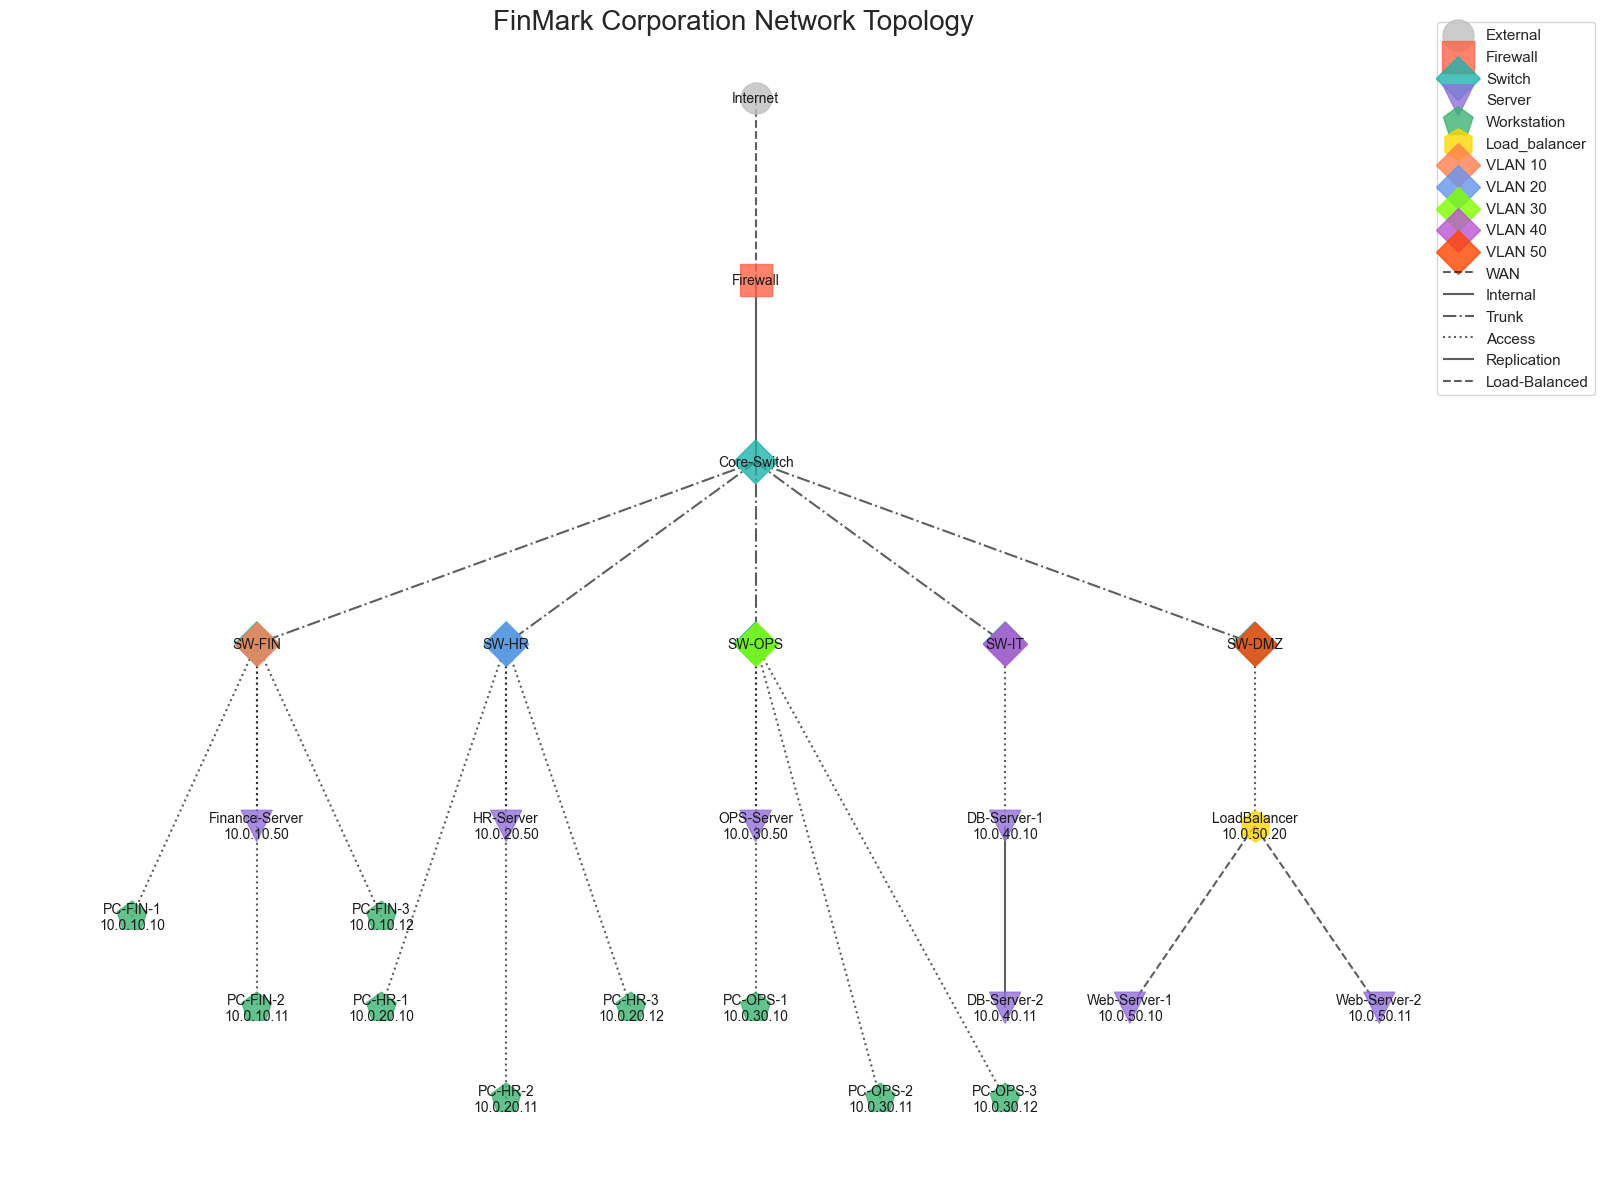

Network topology visualization complete.


In [4]:
# Visualize network topology
plt.figure(figsize=(16, 12))

# Get positions from node attributes
pos = nx.get_node_attributes(G, 'pos')

# Create node colors based on node type or VLAN
node_colors = []
for node in G.nodes():
    if 'vlan' in G.nodes[node]:
        node_colors.append(vlan_colors[G.nodes[node]['vlan']])
    else:
        node_colors.append(node_types[G.nodes[node]['type']])

# Create node shapes based on type
node_shapes = {'external': 'o', 'firewall': 's', 'router': '^', 'switch': 'D', 
                'server': 'v', 'workstation': 'p', 'load_balancer': 'h'}

# Draw nodes by type for proper legend
for node_type, marker in node_shapes.items():
    node_list = [node for node in G.nodes() if G.nodes[node]['type'] == node_type]
    if node_list:
        nx.draw_networkx_nodes(G, pos, 
                               nodelist=node_list, 
                               node_color=[node_types[node_type]]*len(node_list),
                               node_shape=marker, 
                               node_size=500,
                               alpha=0.8,
                               label=node_type.capitalize())

# Draw VLAN colored nodes for legend
legend_added_vlans = set()
for vlan in vlan_colors:
    node_list = [node for node in G.nodes() if G.nodes[node].get('vlan') == vlan]
    if node_list:
        # Group node types within VLAN for visualization
        for node_type, marker in node_shapes.items():
            vlan_type_nodes = [node for node in node_list if G.nodes[node]['type'] == node_type]
            if vlan_type_nodes and vlan not in legend_added_vlans:
                nx.draw_networkx_nodes(G, pos, 
                                     nodelist=vlan_type_nodes, 
                                     node_color=[vlan_colors[vlan]]*len(vlan_type_nodes),
                                     node_shape=marker, 
                                     node_size=500,
                                     alpha=0.8,
                                     label=f"VLAN {vlan}")
                legend_added_vlans.add(vlan)
                break  # Only add one legend entry per VLAN

# Draw edges with different styles by type
edge_styles = {'WAN': 'dashed', 'Internal': 'solid', 'Trunk': 'dashdot', 
               'Access': 'dotted', 'Replication': 'solid', 'Load-Balanced': 'dashed'}

for edge_type, style in edge_styles.items():
    edge_list = [(u, v) for u, v, d in G.edges(data=True) if d['type'] == edge_type]
    if edge_list:
        nx.draw_networkx_edges(G, pos, 
                             edgelist=edge_list, 
                             style=style, 
                             width=1.5, 
                             alpha=0.7,
                             label=edge_type)

# Add labels to nodes
labels = {}
for node in G.nodes():
    if G.nodes[node]['type'] in ['workstation', 'server', 'load_balancer', 'firewall']:
        # Extract IP from description if available
        desc = G.nodes[node]['description']
        ip_start = desc.find('(')
        if ip_start != -1:
            ip_end = desc.find(')')
            ip = desc[ip_start+1:ip_end]
            labels[node] = f"{node}\n{ip}"
        else:
            labels[node] = node
    else:
        labels[node] = node

nx.draw_networkx_labels(G, pos, labels, font_size=10, font_family='sans-serif')

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.02))
plt.title("FinMark Corporation Network Topology", size=20)
plt.axis('off')
plt.tight_layout()
plt.savefig("FinMark_Network_Topology.png", dpi=300, bbox_inches='tight')
plt.show()

print("Network topology visualization complete.")

## 2. Traffic Log Analysis

In this section, we'll create and analyze simulated network traffic logs. We'll generate realistic traffic patterns that represent normal operations, security incidents, and performance issues within the FinMark network. Then we'll parse and analyze these logs to identify patterns and anomalies.

### 2.1 Generating Simulated Traffic Logs

First, let's create a function to generate synthetic traffic logs based on the network topology we defined earlier.

In [5]:
# Function to generate synthetic network traffic logs
def generate_traffic_logs(num_records=1000, include_anomalies=True, start_time=None):
    if start_time is None:
        start_time = datetime.now() - timedelta(hours=24)  # Default to 24 hours ago
    
    # Map nodes to IP addresses
    ip_map = {}
    for node in G.nodes():
        desc = G.nodes[node].get('description', '')
        ip_start = desc.find('(')
        if ip_start != -1:
            ip_end = desc.find(')')
            ip = desc[ip_start+1:ip_end]
            ip_map[node] = ip
        else:
            # Generate placeholder IPs for nodes without explicit IPs
            if node == "Internet":
                ip_map[node] = "203.0.113.254"  # External IP
            elif node == "Firewall":
                ip_map[node] = "203.0.113.1"  # External interface
            elif node == "Core-Switch":
                ip_map[node] = "192.168.100.2"  # Internal interface
            else:
                # Use node type and random host ID for others
                node_type = G.nodes[node].get('type', '')
                vlan = G.nodes[node].get('vlan', 99)
                if vlan != 99:
                    host_id = random.randint(100, 254)
                    ip_map[node] = f"10.0.{vlan}.{host_id}"
                else:
                    host_id = random.randint(1, 254)
                    ip_map[node] = f"192.168.{vlan}.{host_id}"
    
    # Define protocols and services
    protocols = {
        'HTTP': 80,
        'HTTPS': 443,
        'SSH': 22,
        'SQL': 1433,
        'ICMP': 0,
        'DNS': 53,
        'NTP': 123,
        'DHCP': 67
    }
    
    # Define traffic patterns based on device roles
    traffic_patterns = {
        'workstation': ['HTTP', 'HTTPS', 'DNS', 'ICMP', 'SQL'],
        'server': ['HTTP', 'HTTPS', 'SSH', 'ICMP', 'SQL'],
        'external': ['HTTP', 'HTTPS', 'ICMP'],
        'firewall': ['SSH', 'ICMP'],
        'router': ['SSH', 'ICMP'],
        'switch': ['SSH', 'ICMP'],
        'load_balancer': ['HTTP', 'HTTPS', 'SSH', 'ICMP']
    }
    
    # Generate traffic logs
    logs = []
    timestamp = start_time
    
    # Normal traffic generation
    for i in range(num_records):
        # Advance time randomly
        timestamp = timestamp + timedelta(seconds=random.randint(1, 30))
        
        # Choose source and destination
        source_node = random.choice(list(G.nodes()))
        source_type = G.nodes[source_node].get('type', 'unknown')
        source_vlan = G.nodes[source_node].get('vlan', None)
        
        # Filter potential destinations based on allowed connections
        potential_destinations = []
        for dest_node in G.nodes():
            if dest_node != source_node:
                dest_type = G.nodes[dest_node].get('type', 'unknown')
                dest_vlan = G.nodes[dest_node].get('vlan', None)
                
                # Apply basic security rules to filter destinations
                if source_type == 'workstation':
                    if dest_type in ['server', 'external', 'load_balancer']:
                        potential_destinations.append(dest_node)
                        
                elif source_type == 'server':
                    if dest_type in ['server', 'workstation', 'external']:
                        potential_destinations.append(dest_node)
                        
                elif source_type == 'external':
                    if dest_type in ['load_balancer', 'firewall']:
                        potential_destinations.append(dest_node)
                        
                else:  # Network devices can talk to each other
                    potential_destinations.append(dest_node)
        
        # If no valid destinations, skip this iteration
        if not potential_destinations:
            continue
            
        dest_node = random.choice(potential_destinations)
        dest_type = G.nodes[dest_node].get('type', 'unknown')
        dest_vlan = G.nodes[dest_node].get('vlan', None)
        
        # Choose protocol based on source and destination
        if source_type in traffic_patterns:
            protocol = random.choice(traffic_patterns[source_type])
        else:
            protocol = random.choice(list(protocols.keys()))
        
        # Generate traffic details
        packet_size = random.randint(64, 1500)
        
        # Determine status code (mostly successful, but some errors)
        status_code = 200  # Default: Success
        
        # Occasional connection problems
        if random.random() < 0.05:  # 5% chance of connection issue
            status_code = random.choice([401, 403, 404, 500, 503])
        
        # Create log entry
        log_entry = {
            'timestamp': timestamp.strftime('%Y-%m-%d %H:%M:%S'),
            'source_ip': ip_map.get(source_node, '0.0.0.0'),
            'source_node': source_node,
            'source_type': source_type,
            'source_vlan': source_vlan,
            'dest_ip': ip_map.get(dest_node, '0.0.0.0'),
            'dest_node': dest_node, 
            'dest_type': dest_type,
            'dest_vlan': dest_vlan,
            'protocol': protocol,
            'port': protocols[protocol],
            'packet_size': packet_size,
            'status_code': status_code,
            'latency_ms': random.randint(1, 500)  # Simulate various latencies
        }
        
        logs.append(log_entry)
    
    # Add anomalies if requested (security incidents, performance issues, etc.)
    if include_anomalies:
        num_anomalies = int(num_records * 0.05)  # 5% of records as anomalies
        
        for i in range(num_anomalies):
            # Choose anomaly type
            anomaly_type = random.choice(['security', 'performance', 'availability'])
            timestamp = start_time + timedelta(minutes=random.randint(1, 24*60))
            
            if anomaly_type == 'security':
                # Security incident (unusual protocol or unauthorized access)
                source_node = "Internet"
                dest_node = random.choice([n for n in G.nodes() if G.nodes[n].get('type') in ['server', 'workstation']])
                protocol = random.choice(['SSH', 'SQL'])
                
                log_entry = {
                    'timestamp': timestamp.strftime('%Y-%m-%d %H:%M:%S'),
                    'source_ip': '198.51.100.' + str(random.randint(1, 255)),  # Random external IP
                    'source_node': source_node,
                    'source_type': 'external',
                    'source_vlan': None,
                    'dest_ip': ip_map.get(dest_node, '0.0.0.0'),
                    'dest_node': dest_node,
                    'dest_type': G.nodes[dest_node].get('type', 'unknown'),
                    'dest_vlan': G.nodes[dest_node].get('vlan', None),
                    'protocol': protocol,
                    'port': protocols[protocol],
                    'packet_size': random.randint(64, 1500),
                    'status_code': random.choice([200, 401, 403]),
                    'latency_ms': random.randint(1, 50),
                    'anomaly': 'security_incident'
                }
                
            elif anomaly_type == 'performance':
                # Performance issue (high latency)
                source_node = random.choice([n for n in G.nodes() if G.nodes[n].get('type') == 'workstation'])
                dest_node = random.choice([n for n in G.nodes() if G.nodes[n].get('type') == 'server'])
                protocol = random.choice(['HTTP', 'HTTPS'])
                
                log_entry = {
                    'timestamp': timestamp.strftime('%Y-%m-%d %H:%M:%S'),
                    'source_ip': ip_map.get(source_node, '0.0.0.0'),
                    'source_node': source_node,
                    'source_type': G.nodes[source_node].get('type', 'unknown'),
                    'source_vlan': G.nodes[source_node].get('vlan', None),
                    'dest_ip': ip_map.get(dest_node, '0.0.0.0'),
                    'dest_node': dest_node, 
                    'dest_type': G.nodes[dest_node].get('type', 'unknown'),
                    'dest_vlan': G.nodes[dest_node].get('vlan', None),
                    'protocol': protocol,
                    'port': protocols[protocol],
                    'packet_size': random.randint(64, 1500),
                    'status_code': 200,
                    'latency_ms': random.randint(3000, 20000),  # Very high latency
                    'anomaly': 'performance_issue'
                }
                
            else:  # availability
                # Availability issue (service down)
                source_node = random.choice([n for n in G.nodes() if G.nodes[n].get('type') == 'workstation'])
                dest_node = random.choice([n for n in G.nodes() if G.nodes[n].get('type') in ['server', 'load_balancer']])
                protocol = random.choice(['HTTP', 'HTTPS'])
                
                log_entry = {
                    'timestamp': timestamp.strftime('%Y-%m-%d %H:%M:%S'),
                    'source_ip': ip_map.get(source_node, '0.0.0.0'),
                    'source_node': source_node,
                    'source_type': G.nodes[source_node].get('type', 'unknown'),
                    'source_vlan': G.nodes[source_node].get('vlan', None),
                    'dest_ip': ip_map.get(dest_node, '0.0.0.0'),
                    'dest_node': dest_node,
                    'dest_type': G.nodes[dest_node].get('type', 'unknown'),
                    'dest_vlan': G.nodes[dest_node].get('vlan', None),
                    'protocol': protocol,
                    'port': protocols[protocol],
                    'packet_size': random.randint(64, 1500),
                    'status_code': random.choice([500, 503, 504]),
                    'latency_ms': random.randint(500, 30000),
                    'anomaly': 'availability_issue'
                }
            
            logs.append(log_entry)
    
    # Convert logs to DataFrame
    df_logs = pd.DataFrame(logs)
    
    # Sort by timestamp
    df_logs = df_logs.sort_values('timestamp')
    
    return df_logs

# Generate 5000 traffic log entries
traffic_logs = generate_traffic_logs(num_records=5000, include_anomalies=True)

# Display sample logs
print(f"Generated {len(traffic_logs)} traffic log entries")
print("\nSample logs:")
traffic_logs.head(10)

Generated 5250 traffic log entries

Sample logs:


,timestamp,source_ip,source_node,source_type,source_vlan,dest_ip,dest_node,dest_type,dest_vlan,protocol,port,packet_size,status_code,latency_ms,anomaly
0,2025-06-23 14:55:16,10.0.30.11,PC-OPS-2,workstation,30.0,10.0.10.50,Finance-Server,server,10.0,SQL,1433,242,200,17,NaN
1,2025-06-23 14:55:17,192.168.100.2,Core-Switch,switch,NaN,10.0.50.157,SW-DMZ,switch,50.0,SSH,22,1098,200,288,NaN
2,2025-06-23 14:55:24,10.0.30.10,PC-OPS-1,workstation,30.0,10.0.50.11,Web-Server-2,server,50.0,ICMP,0,515,200,143,NaN
3,2025-06-23 14:55:50,203.0.113.254,Internet,external,NaN,203.0.113.1,Firewall,firewall,NaN,ICMP,0,929,200,80,NaN
4,2025-06-23 14:55:57,10.0.30.12,PC-OPS-3,workstation,30.0,10.0.40.11,DB-Server-2,server,40.0,HTTP,80,253,200,184,NaN
5,2025-06-23 14:56:25,10.0.40.10,DB-Server-1,server,40.0,10.0.10.11,PC-FIN-2,workstation,10.0,HTTP,80,1004,200,499,NaN
6,2025-06-23 14:56:55,10.0.40.11,DB-Server-2,server,40.0,10.0.20.50,HR-Server,server,20.0,SQL,1433,664,200,317,NaN
5190,2025-06-23 14:57:11,198.51.100.241,Internet,external,NaN,10.0.30.11,PC-OPS-2,workstation,30.0,SQL,1433,213,401,3,security_incident
7,2025-06-23 14:57:24,10.0.40.10,DB-Server-1,server,40.0,10.0.50.11,Web-Server-2,server,50.0,HTTP,80,157,200,396,NaN
8,2025-06-23 14:57:34,192.168.100.2,Core-Switch,switch,NaN,10.0.10.50,Finance-Server,server,10.0,SSH,22,842,200,326,NaN


### 2.2 Traffic Analysis and Visualization

Now that we've generated simulated traffic logs, let's analyze them to identify patterns, detect anomalies, and understand network behavior. We'll focus on:

1. Protocol distribution
2. VLAN traffic patterns
3. Latency analysis
4. Security incident detection
5. Performance bottlenecks

In [6]:
# Basic traffic statistics
print("Traffic Statistics:")
print(f"Total packets: {len(traffic_logs)}")
print(f"Unique source nodes: {traffic_logs['source_node'].nunique()}")
print(f"Unique destination nodes: {traffic_logs['dest_node'].nunique()}")
print("\nProtocol Distribution:")
protocol_dist = traffic_logs['protocol'].value_counts()
print(protocol_dist)

print("\nStatus Code Distribution:")
status_dist = traffic_logs['status_code'].value_counts()
print(status_dist)

print("\nAverage Latency by Protocol (ms):")
latency_by_protocol = traffic_logs.groupby('protocol')['latency_ms'].mean().sort_values(ascending=False)
print(latency_by_protocol)

# Check for anomalies
anomaly_count = traffic_logs.get('anomaly', pd.Series(None)).dropna().count()
print(f"\nDetected anomalies: {anomaly_count}")
if anomaly_count > 0:
    print("\nAnomaly Types:")
    print(traffic_logs[traffic_logs['anomaly'].notna()]['anomaly'].value_counts())

Traffic Statistics:
Total packets: 5250
Unique source nodes: 25
Unique destination nodes: 25

Protocol Distribution:
protocol
ICMP     1485
SSH      1067
HTTPS     886
HTTP      818
SQL       672
DNS       322
Name: count, dtype: int64

Status Code Distribution:
status_code
200    4857
401      86
500      84
503      81
403      67
404      46
504      29
Name: count, dtype: int64

Average Latency by Protocol (ms):
protocol
HTTP     1481.017115
HTTPS    1388.840858
DNS       260.350932
ICMP      246.771044
SSH       246.671040
SQL       235.209821
Name: latency_ms, dtype: float64

Detected anomalies: 250

Anomaly Types:
anomaly
security_incident     95
availability_issue    94
performance_issue     61
Name: count, dtype: int64


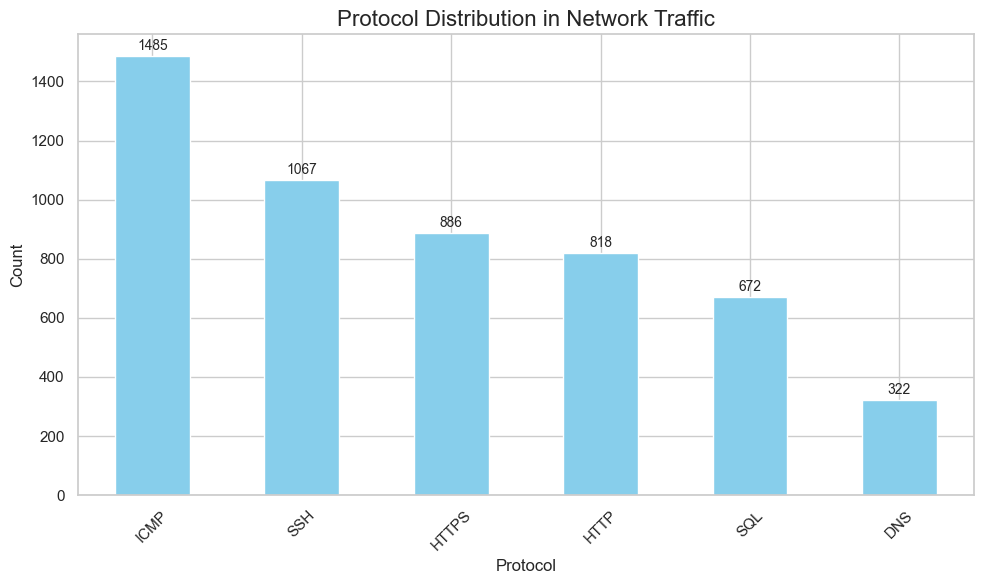

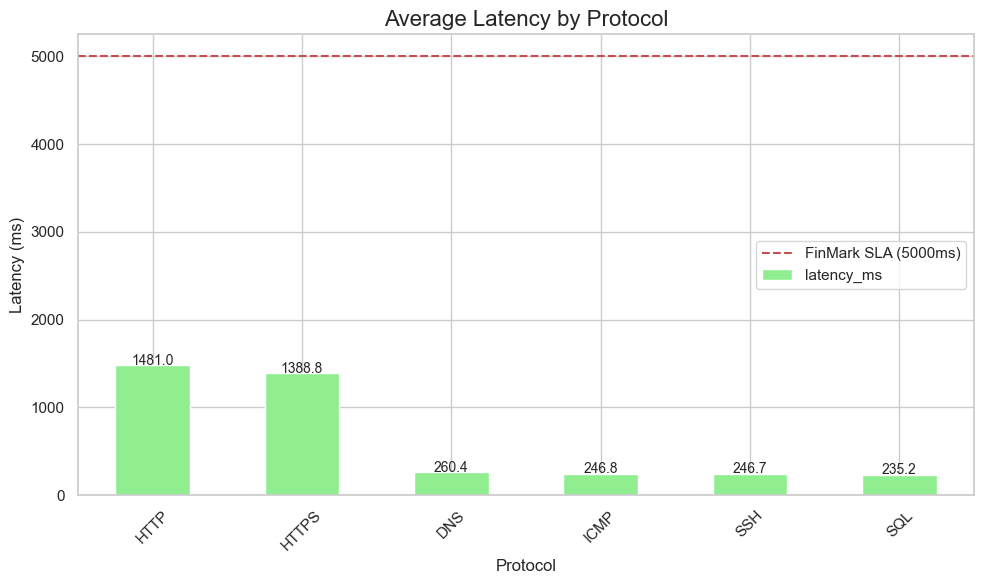

In [7]:
# Visualize protocol distribution
plt.figure(figsize=(10, 6))
ax = protocol_dist.plot(kind='bar', color='skyblue')
plt.title('Protocol Distribution in Network Traffic', fontsize=16)
plt.xlabel('Protocol', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

for i, v in enumerate(protocol_dist):
    ax.text(i, v + 20, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.savefig("FinMark_Protocol_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# Visualize latency by protocol
plt.figure(figsize=(10, 6))
ax = latency_by_protocol.plot(kind='bar', color='lightgreen')
plt.title('Average Latency by Protocol', fontsize=16)
plt.xlabel('Protocol', fontsize=12)
plt.ylabel('Latency (ms)', fontsize=12)
plt.xticks(rotation=45)

for i, v in enumerate(latency_by_protocol):
    ax.text(i, v + 5, f"{v:.1f}", ha='center', fontsize=10)

plt.axhline(y=5000, color='r', linestyle='--', label='FinMark SLA (5000ms)')
plt.legend()
plt.tight_layout()
plt.savefig("FinMark_Protocol_Latency.png", dpi=300, bbox_inches='tight')
plt.show()

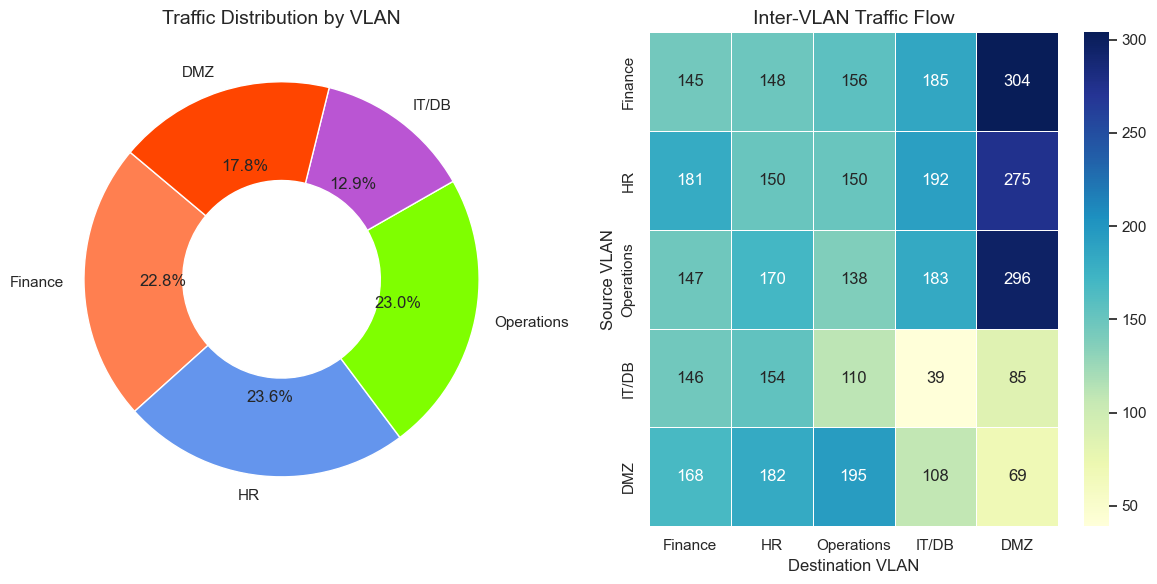

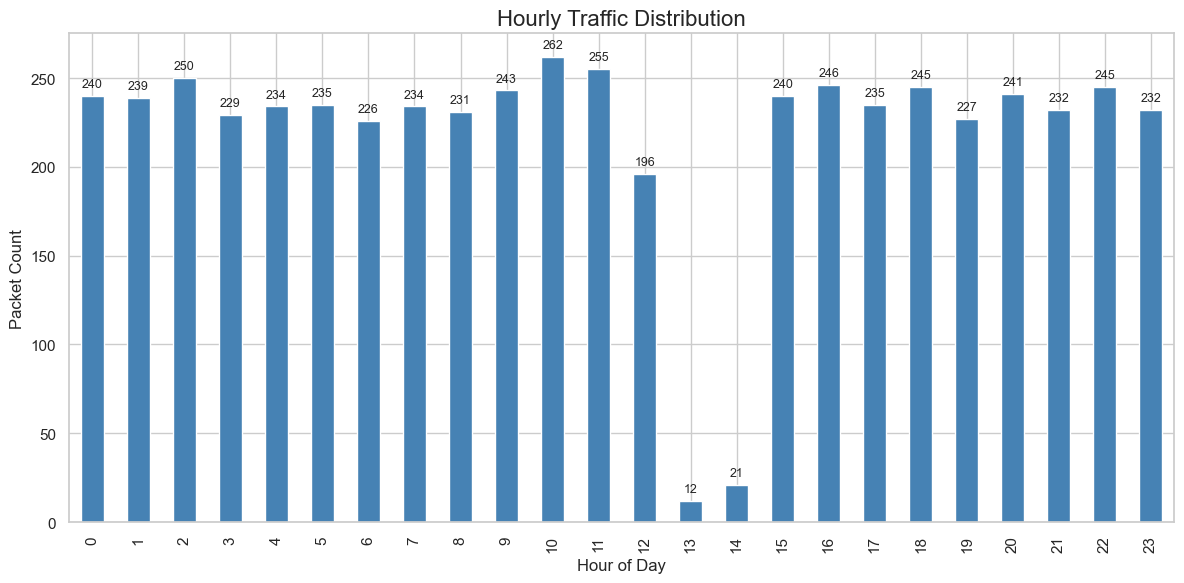

In [8]:
# Analyze VLAN traffic patterns
vlan_traffic = traffic_logs[~traffic_logs['source_vlan'].isna()].groupby('source_vlan').size()
vlan_names = {
    10: 'Finance',
    20: 'HR',
    30: 'Operations',
    40: 'IT/DB',
    50: 'DMZ'
}

# Map VLAN numbers to department names for display
vlan_traffic_renamed = vlan_traffic.rename(index=vlan_names)

# Plot VLAN traffic distribution
plt.figure(figsize=(12, 6))

# VLAN traffic subplot
plt.subplot(1, 2, 1)
vlan_traffic_renamed.plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                          colors=[vlan_colors.get(k, '#333333') for k in vlan_traffic.index],
                          wedgeprops=dict(width=0.5))
plt.title('Traffic Distribution by VLAN', fontsize=14)
plt.ylabel('')

# Inter-VLAN traffic analysis - create matrix of source->destination VLAN traffic
vlan_matrix = pd.crosstab(traffic_logs['source_vlan'], traffic_logs['dest_vlan'])
vlan_matrix = vlan_matrix.fillna(0).astype(int)

# Replace VLAN numbers with names
vlan_matrix_renamed = vlan_matrix.rename(index=vlan_names).rename(columns=vlan_names)

# Plot inter-VLAN traffic as heatmap
plt.subplot(1, 2, 2)
sns.heatmap(vlan_matrix_renamed, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Inter-VLAN Traffic Flow', fontsize=14)
plt.xlabel('Destination VLAN')
plt.ylabel('Source VLAN')

plt.tight_layout()
plt.savefig("FinMark_VLAN_Traffic.png", dpi=300, bbox_inches='tight')
plt.show()

# Analyze traffic volume over time
# Convert timestamp to datetime
traffic_logs['timestamp'] = pd.to_datetime(traffic_logs['timestamp'])

# Group by hour and count packets
hourly_traffic = traffic_logs.groupby(traffic_logs['timestamp'].dt.hour).size()

# Plot hourly traffic
plt.figure(figsize=(12, 6))
ax = hourly_traffic.plot(kind='bar', color='steelblue')
plt.title('Hourly Traffic Distribution', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Packet Count', fontsize=12)

for i, v in enumerate(hourly_traffic):
    ax.text(i, v + 5, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig("FinMark_Hourly_Traffic.png", dpi=300, bbox_inches='tight')
plt.show()

## 3. Bandwidth Utilization Charts

In this section, we'll generate and visualize bandwidth utilization across the network. We'll create simulated bandwidth metrics for different segments of the network and show how to implement effective QoS policies to prioritize critical traffic.

In [9]:
# Generate simulated bandwidth utilization data over time
def generate_bandwidth_data(hours=24, interval_minutes=5):
    """
    Generate simulated bandwidth utilization data for different network segments
    """
    # Start time (24 hours ago)
    start_time = datetime.now() - timedelta(hours=hours)
    
    # Create time intervals
    intervals = pd.date_range(start=start_time, periods=int(hours*60/interval_minutes), freq=f'{interval_minutes}min')
    
    # Define network segments to monitor
    segments = {
        'WAN Link': {'capacity': 100, 'pattern': 'business_hours', 'priority': 'high'},
        'Finance VLAN': {'capacity': 1000, 'pattern': 'business_hours', 'priority': 'critical'},
        'HR VLAN': {'capacity': 1000, 'pattern': 'business_hours', 'priority': 'normal'},
        'Operations VLAN': {'capacity': 1000, 'pattern': '24x7', 'priority': 'high'},
        'IT/DB VLAN': {'capacity': 1000, 'pattern': '24x7', 'priority': 'critical'},
        'DMZ VLAN': {'capacity': 1000, 'pattern': 'web_traffic', 'priority': 'high'}
    }
    
    # Initialize data structure
    data = []
    
    # Generate utilization for each segment at each interval
    for segment_name, segment_info in segments.items():
        capacity = segment_info['capacity']  # Mbps
        pattern = segment_info['pattern']
        
        for timestamp in intervals:
            hour = timestamp.hour
            minute = timestamp.minute
            
            # Base utilization varies by pattern
            if pattern == 'business_hours':
                # Higher during 8am-5pm, lower otherwise
                base_util = random.uniform(20, 60) if 8 <= hour <= 17 else random.uniform(5, 20)
            elif pattern == '24x7':
                # Consistent throughout the day with some variation
                base_util = random.uniform(15, 45)
            elif pattern == 'web_traffic':
                # Peaks in morning, lunch, and evening
                if 8 <= hour <= 10 or 12 <= hour <= 14 or 19 <= hour <= 21:
                    base_util = random.uniform(30, 70)
                else:
                    base_util = random.uniform(10, 40)
            
            # Add some random noise
            noise = random.uniform(-10, 10)
            
            # Simulated utilization percentage
            utilization = max(0, min(100, base_util + noise))
            
            # Calculate bandwidth in Mbps
            bandwidth_mbps = (utilization / 100) * capacity
            
            # Add data point
            data.append({
                'timestamp': timestamp,
                'segment': segment_name,
                'capacity_mbps': capacity,
                'utilization_percent': utilization,
                'bandwidth_mbps': bandwidth_mbps,
                'priority': segment_info['priority']
            })
    
    # Create DataFrame
    df_bandwidth = pd.DataFrame(data)
    
    # Sort by timestamp
    df_bandwidth = df_bandwidth.sort_values('timestamp')
    
    return df_bandwidth

# Generate bandwidth data
bandwidth_data = generate_bandwidth_data(hours=24, interval_minutes=5)

# Display sample data
print(f"Generated {len(bandwidth_data)} bandwidth data points")
print("\nSample bandwidth data:")
bandwidth_data.head(10)

Generated 1728 bandwidth data points

Sample bandwidth data:


,timestamp,segment,capacity_mbps,utilization_percent,bandwidth_mbps,priority
0,2025-06-23 14:55:13.817957,WAN Link,100,36.651847,36.651847,high
576,2025-06-23 14:55:13.817957,HR VLAN,1000,34.236841,342.368415,normal
864,2025-06-23 14:55:13.817957,Operations VLAN,1000,31.560296,315.602957,high
1152,2025-06-23 14:55:13.817957,IT/DB VLAN,1000,15.579570,155.795698,critical
1440,2025-06-23 14:55:13.817957,DMZ VLAN,1000,47.817411,478.174107,high
288,2025-06-23 14:55:13.817957,Finance VLAN,1000,52.239639,522.396395,critical
1153,2025-06-23 15:00:13.817957,IT/DB VLAN,1000,22.615664,226.156644,critical
1,2025-06-23 15:00:13.817957,WAN Link,100,48.311608,48.311608,high
577,2025-06-23 15:00:13.817957,HR VLAN,1000,46.596628,465.966283,normal
865,2025-06-23 15:00:13.817957,Operations VLAN,1000,43.232387,432.323867,high


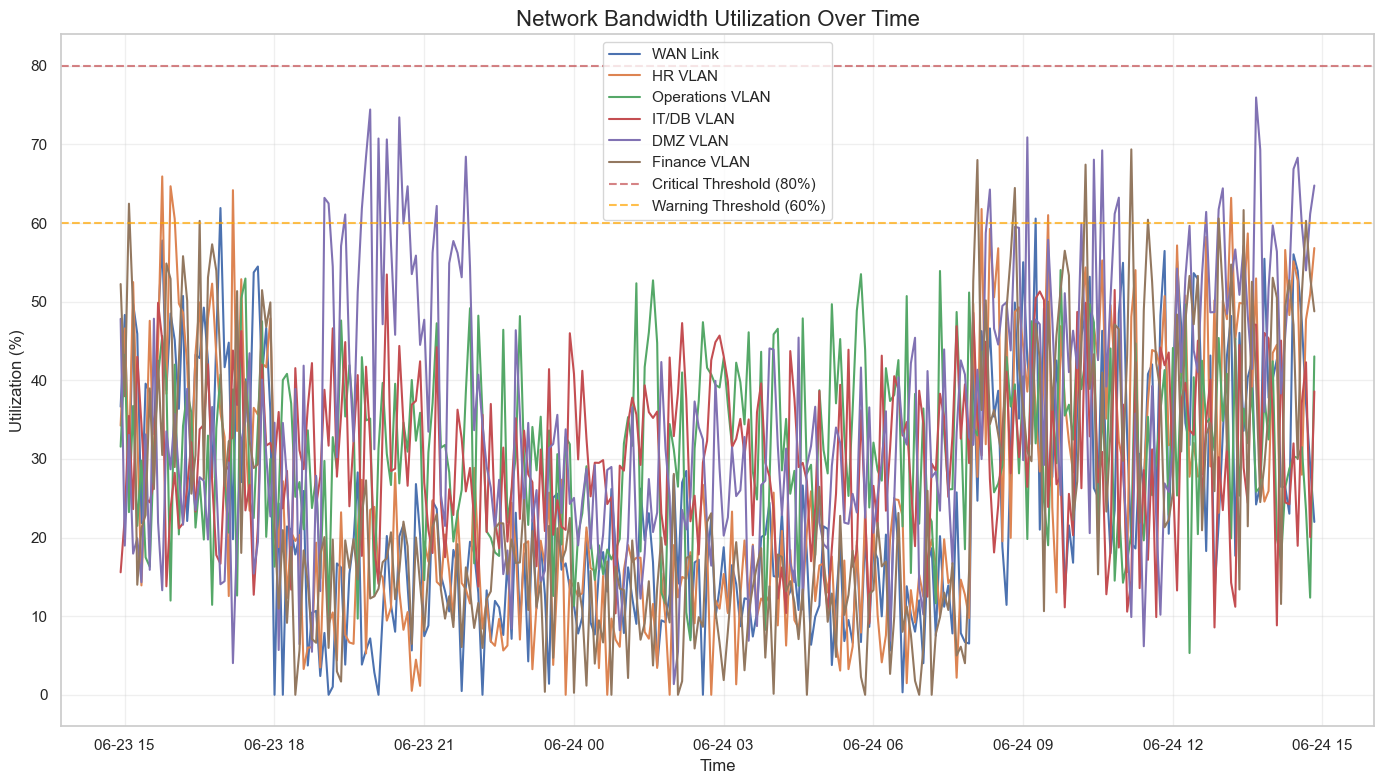

In [10]:
# Visualize bandwidth utilization over time
plt.figure(figsize=(14, 8))

# Get unique segments
segments = bandwidth_data['segment'].unique()

# Create a time series plot for each segment
for segment in segments:
    segment_data = bandwidth_data[bandwidth_data['segment'] == segment]
    plt.plot(segment_data['timestamp'], segment_data['utilization_percent'], label=segment)

plt.title('Network Bandwidth Utilization Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Utilization (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')

# Add thresholds
plt.axhline(y=80, color='r', linestyle='--', alpha=0.7, label='Critical Threshold (80%)')
plt.axhline(y=60, color='orange', linestyle='--', alpha=0.7, label='Warning Threshold (60%)')

plt.legend()
plt.tight_layout()
plt.savefig("FinMark_Bandwidth_Utilization.png", dpi=300, bbox_inches='tight')
plt.show()

# Create interactive plots with Plotly
fig = px.line(bandwidth_data, x='timestamp', y='bandwidth_mbps', color='segment',
              title='Interactive Bandwidth Utilization Over Time',
              labels={'bandwidth_mbps': 'Bandwidth (Mbps)', 'timestamp': 'Time'})

# Add threshold lines
fig.add_shape(
    type="line", line_color="red", line_width=2, line_dash="dash",
    y0=80, y1=80, x0=bandwidth_data['timestamp'].min(), x1=bandwidth_data['timestamp'].max()
)

fig.update_layout(
    height=600, 
    legend_title="Network Segment",
    hovermode="x unified"
)

# Show plot
fig.show()

# Create stacked area chart to show bandwidth distribution
pivot_data = bandwidth_data.pivot_table(
    index='timestamp', 
    columns='segment', 
    values='bandwidth_mbps',
    aggfunc='mean'
).reset_index()

fig = px.area(pivot_data, x='timestamp', y=segments,
              title='Network Bandwidth Distribution',
              labels={'timestamp': 'Time', 'value': 'Bandwidth (Mbps)'})

fig.update_layout(
    height=600,
    hovermode="x unified"
)

# Show plot
fig.show()

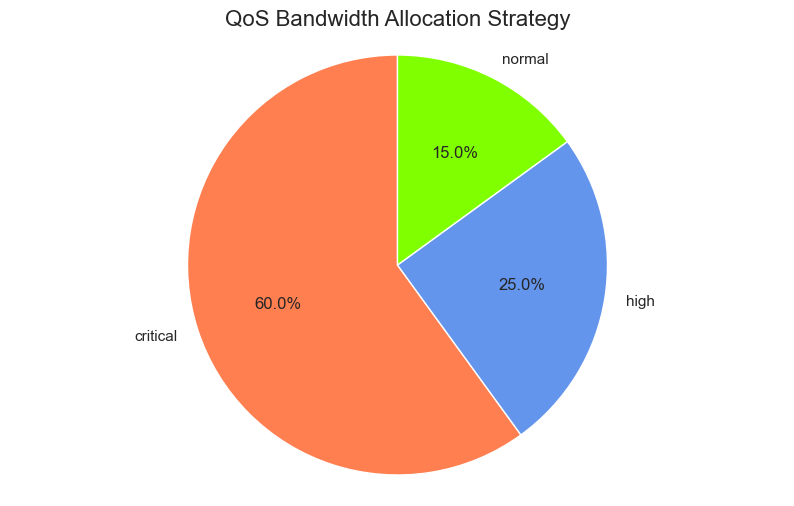

<Figure size 1000x600 with 0 Axes>

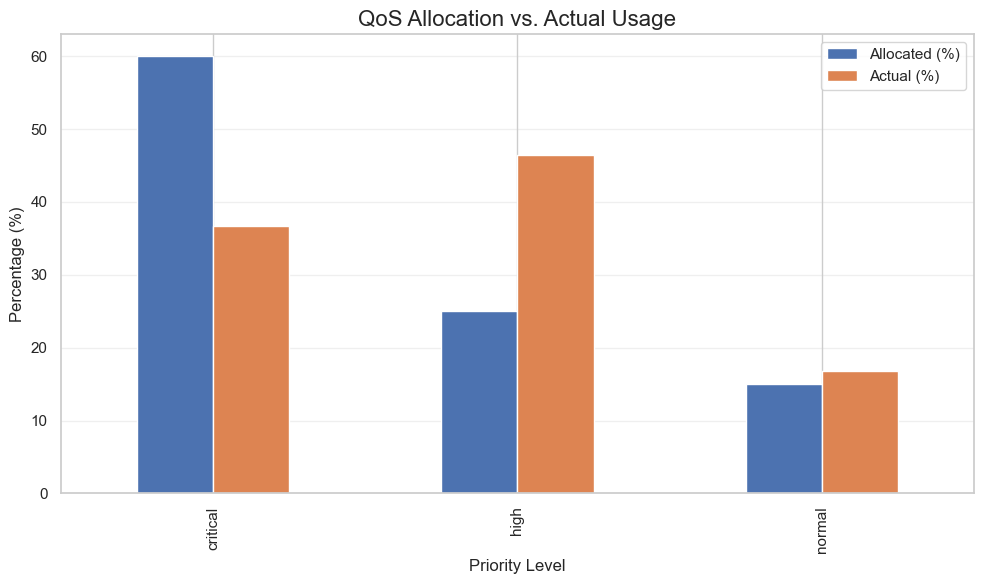

QoS Allocation vs. Actual Usage:
          Allocated (%)  Actual (%)
priority                           
critical             60   36.754277
high                 25   46.409589
normal               15   16.836134


In [11]:
# Visualize QoS prioritization
# Create pie chart for bandwidth allocation by priority
priority_allocation = {
    'critical': 60,  # 60% for critical traffic
    'high': 25,      # 25% for high-priority traffic
    'normal': 15     # 15% for normal traffic
}

# Create dataframe for pie chart
qos_df = pd.DataFrame({
    'priority': priority_allocation.keys(),
    'allocation': priority_allocation.values()
})

# Create pie chart
plt.figure(figsize=(10, 6))
plt.pie(qos_df['allocation'], labels=qos_df['priority'], autopct='%1.1f%%',
        colors=['#FF7F50', '#6495ED', '#7FFF00'], startangle=90)
plt.title('QoS Bandwidth Allocation Strategy', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig("FinMark_QoS_Allocation.png", dpi=300, bbox_inches='tight')
plt.show()

# Create bar chart showing actual vs. allocated bandwidth by priority
# Aggregate actual bandwidth by priority
actual_usage = bandwidth_data.groupby('priority')['bandwidth_mbps'].sum()
total_actual = actual_usage.sum()
actual_percentages = (actual_usage / total_actual) * 100

# Create comparison dataframe
compare_df = pd.DataFrame({
    'Allocated (%)': [priority_allocation.get(p, 0) for p in actual_usage.index],
    'Actual (%)': actual_percentages.values
}, index=actual_usage.index)

# Create comparison bar chart
plt.figure(figsize=(10, 6))
compare_df.plot(kind='bar', figsize=(10, 6))
plt.title('QoS Allocation vs. Actual Usage', fontsize=16)
plt.xlabel('Priority Level', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig("FinMark_QoS_Comparison.png", dpi=300, bbox_inches='tight')
plt.show()

# Display the comparison data
print("QoS Allocation vs. Actual Usage:")
print(compare_df)

## 4. ACL/Firewall Rule Logic Simulation

In this section, we'll implement a Python-based simulation of firewall rules and access control lists (ACLs). This will allow us to test and validate the security policies defined in our network design.

In [12]:
# Define Firewall Rule Simulation Engine
class FirewallRuleEngine:
    def __init__(self):
        # Initialize with FinMark's security rules
        self.rules = [
            # Rule 1: Allow Finance VLAN to access HTTPS anywhere
            {
                'rule_id': 1,
                'action': 'ALLOW',
                'source_vlan': 10,  # Finance VLAN
                'protocol': 'HTTPS',
                'port': 443,
                'description': 'Finance HTTPS access'
            },
            # Rule 2: Allow Finance VLAN to access SQL on Database servers
            {
                'rule_id': 2,
                'action': 'ALLOW',
                'source_vlan': 10,  # Finance VLAN
                'dest_vlan': 40,    # IT/DB VLAN
                'protocol': 'SQL',
                'port': 1433,
                'description': 'Finance DB access'
            },
            # Rule 3: Block direct database access from anywhere else
            {
                'rule_id': 3,
                'action': 'DENY',
                'protocol': 'SQL',
                'port': 1433,
                'description': 'Block direct DB access'
            },
            # Rule 4: Allow internal networks to access web services
            {
                'rule_id': 4,
                'action': 'ALLOW',
                'source_network': '10.0.0.0/16',  # All internal VLANs
                'protocol': 'HTTP',
                'port': 80,
                'description': 'Internal HTTP access'
            },
            # Rule 5: Allow internal networks to access secure web services
            {
                'rule_id': 5,
                'action': 'ALLOW',
                'source_network': '10.0.0.0/16',  # All internal VLANs
                'protocol': 'HTTPS',
                'port': 443,
                'description': 'Internal HTTPS access'
            },
            # Rule 6: Allow internal networks to use ICMP (ping)
            {
                'rule_id': 6,
                'action': 'ALLOW',
                'source_network': '10.0.0.0/16',  # All internal VLANs
                'protocol': 'ICMP',
                'description': 'Internal ICMP'
            },
            # Rule 7: Block all ICMP from external sources
            {
                'rule_id': 7,
                'action': 'DENY',
                'protocol': 'ICMP',
                'source_network': '0.0.0.0/0',
                'description': 'Block external ICMP'
            },
            # Rule 8: Default deny all
            {
                'rule_id': 8,
                'action': 'DENY',
                'protocol': 'ANY',
                'description': 'Default deny rule'
            }
        ]
    
    def is_ip_in_network(self, ip, network):
        """Simple function to check if IP is in network"""
        if network is None:
            return True  # Match any network if not specified
        
        # For our simulation, we'll use a simple string comparison
        if ip.startswith(network.split('/')[0].rsplit('.', 1)[0]):
            return True
        return False
    
    def evaluate_packet(self, packet):
        """Evaluate a packet against the firewall rules"""
        # Extract packet information
        source_ip = packet.get('source_ip')
        dest_ip = packet.get('dest_ip')
        source_vlan = packet.get('source_vlan')
        dest_vlan = packet.get('dest_vlan')
        protocol = packet.get('protocol')
        port = packet.get('port')
        
        # Evaluate against each rule in order
        for rule in self.rules:
            match = True  # Start with assumption of match
            
            # Check source VLAN if specified in rule
            if 'source_vlan' in rule and rule['source_vlan'] != source_vlan:
                match = False
                continue
            
            # Check dest VLAN if specified in rule
            if 'dest_vlan' in rule and rule['dest_vlan'] != dest_vlan:
                match = False
                continue
            
            # Check source network if specified in rule
            if 'source_network' in rule and not self.is_ip_in_network(source_ip, rule['source_network']):
                match = False
                continue
            
            # Check protocol if specified
            if 'protocol' in rule and rule['protocol'] != 'ANY' and rule['protocol'] != protocol:
                match = False
                continue
            
            # Check port if specified
            if 'port' in rule and rule['port'] != port:
                match = False
                continue
            
            # If we've passed all checks, the rule matches
            if match:
                return {
                    'action': rule['action'],
                    'rule_id': rule['rule_id'],
                    'description': rule['description']
                }
        
        # If no rule matched, deny by default
        return {'action': 'DENY', 'rule_id': 0, 'description': 'No matching rule'}

# Create an instance of the firewall engine
firewall = FirewallRuleEngine()

# Test packets to evaluate
test_packets = [
    # Normal Finance to Database traffic (should be allowed)
    {
        'test_name': 'Finance to Database',
        'source_ip': '10.0.10.10',
        'source_vlan': 10,
        'dest_ip': '10.0.40.10',
        'dest_vlan': 40,
        'protocol': 'SQL',
        'port': 1433
    },
    # HR trying to access database directly (should be denied)
    {
        'test_name': 'HR to Database',
        'source_ip': '10.0.20.10',
        'source_vlan': 20,
        'dest_ip': '10.0.40.10',
        'dest_vlan': 40,
        'protocol': 'SQL',
        'port': 1433
    },
    # External attempt to access database (should be denied)
    {
        'test_name': 'External to Database',
        'source_ip': '203.0.113.100',
        'source_vlan': None,
        'dest_ip': '10.0.40.10',
        'dest_vlan': 40,
        'protocol': 'SQL',
        'port': 1433
    },
    # Internal web access (should be allowed)
    {
        'test_name': 'Internal Web Access',
        'source_ip': '10.0.30.15',
        'source_vlan': 30,
        'dest_ip': '10.0.50.10',
        'dest_vlan': 50,
        'protocol': 'HTTP',
        'port': 80
    },
    # Internal ping (should be allowed)
    {
        'test_name': 'Internal ICMP',
        'source_ip': '10.0.30.15',
        'source_vlan': 30,
        'dest_ip': '10.0.20.10',
        'dest_vlan': 20,
        'protocol': 'ICMP',
        'port': 0
    },
    # External ping (should be denied)
    {
        'test_name': 'External ICMP',
        'source_ip': '203.0.113.100',
        'source_vlan': None,
        'dest_ip': '10.0.50.10',
        'dest_vlan': 50,
        'protocol': 'ICMP',
        'port': 0
    }
]

# Evaluate each test packet
results = []

print("Firewall Rule Evaluation Results:")
print("-" * 80)
print(f"{'Test Case':<20} {'Source':<15} {'Destination':<15} {'Protocol':<10} {'Decision':<10} {'Rule ID':<8} {'Description'}")
print("-" * 80)

for packet in test_packets:
    result = firewall.evaluate_packet(packet)
    results.append({**packet, **result})
    
    print(f"{packet['test_name']:<20} {packet['source_ip']:<15} {packet['dest_ip']:<15} {packet['protocol']:<10} {result['action']:<10} {result['rule_id']:<8} {result['description']}")

print("-" * 80)

Firewall Rule Evaluation Results:
--------------------------------------------------------------------------------
Test Case            Source          Destination     Protocol   Decision   Rule ID  Description
--------------------------------------------------------------------------------
Finance to Database  10.0.10.10      10.0.40.10      SQL        ALLOW      2        Finance DB access
HR to Database       10.0.20.10      10.0.40.10      SQL        DENY       3        Block direct DB access
External to Database 203.0.113.100   10.0.40.10      SQL        DENY       3        Block direct DB access
Internal Web Access  10.0.30.15      10.0.50.10      HTTP       DENY       8        Default deny rule
Internal ICMP        10.0.30.15      10.0.20.10      ICMP       DENY       8        Default deny rule
External ICMP        203.0.113.100   10.0.50.10      ICMP       DENY       8        Default deny rule
--------------------------------------------------------------------------------


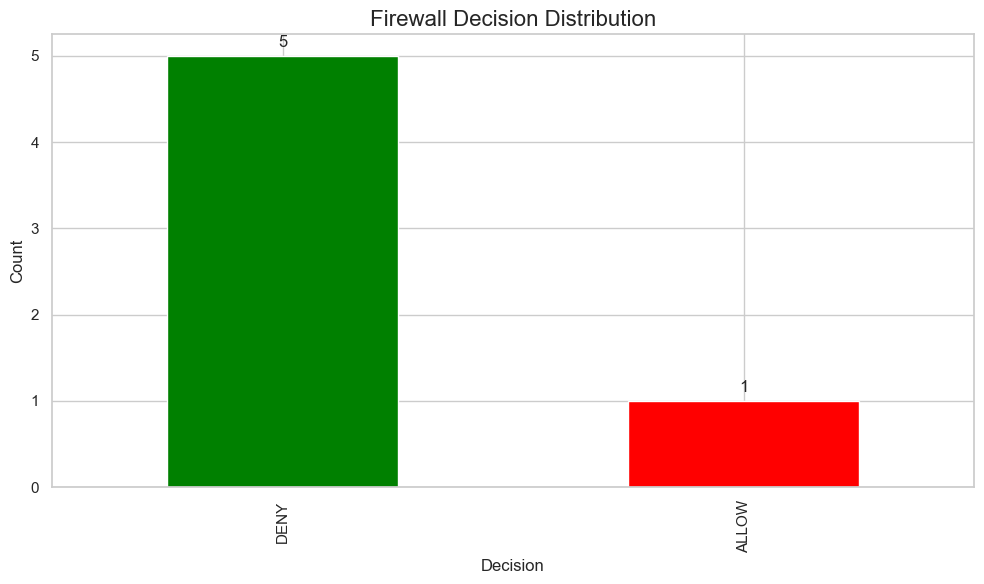


Traffic Flow Permission Matrix (Values = Number of ALLOW decisions):
dest_vlan     HR  IT/DB  DMZ
source_vlan                 
Finance      NaN    1.0  NaN
HR           NaN    0.0  NaN
Operations   0.0    NaN  0.0
External     NaN    0.0  0.0


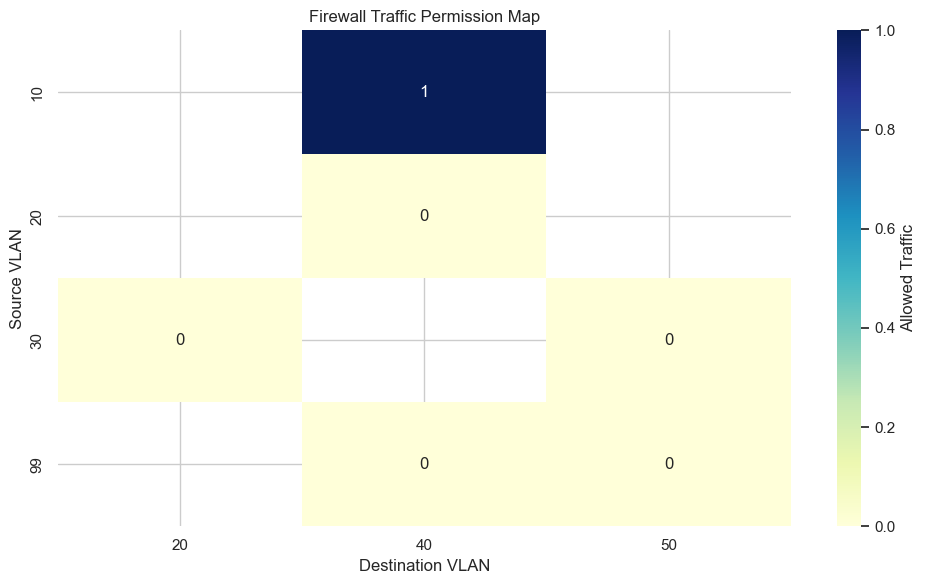

In [13]:
# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)

# Create visualization of firewall rule decisions
plt.figure(figsize=(10, 6))
decision_counts = results_df['action'].value_counts()

# Bar chart of allow/deny decisions
ax = decision_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Firewall Decision Distribution', fontsize=16)
plt.xlabel('Decision', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, v in enumerate(decision_counts):
    ax.text(i, v + 0.1, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.savefig("FinMark_Firewall_Decisions.png", dpi=300, bbox_inches='tight')
plt.show()

# Create sankey diagram showing traffic flow and firewall decisions
from plotly.subplots import make_subplots

# Create a source-to-destination matrix showing allowed vs denied
source_dest = pd.crosstab(
    results_df['source_vlan'].fillna(99).astype(int),  # 99 represents external
    results_df['dest_vlan'].fillna(99).astype(int),    # 99 represents external
    values=results_df['action'].map({'ALLOW': 1, 'DENY': 0}),
    aggfunc='sum'
)

# Display the matrix
print("\nTraffic Flow Permission Matrix (Values = Number of ALLOW decisions):")
vlan_names_ext = {**vlan_names, 99: 'External'}
labeled_matrix = source_dest.rename(index=vlan_names_ext).rename(columns=vlan_names_ext)
print(labeled_matrix)

# Create heatmap of allowed traffic
plt.figure(figsize=(10, 6))
sns.heatmap(source_dest, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Allowed Traffic'})
plt.title('Firewall Traffic Permission Map')
plt.xlabel('Destination VLAN')
plt.ylabel('Source VLAN')
plt.tight_layout()
plt.savefig("FinMark_Traffic_Permissions.png", dpi=300, bbox_inches='tight')
plt.show()

## 5. Threat Assessment Framework & Security Heatmap

In this final section, we'll implement a threat assessment framework to identify and visualize potential security risks across the FinMark network. We'll generate a heatmap that highlights the most vulnerable areas of the infrastructure.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define our network devices and threat categories
devices = [
    'Core-Switch', 'DMZ-Switch', 'Finance-Switch', 'HR-Switch', 'IT-Switch',
    'External-Router', 'Internal-Router', 'Firewall', 
    'Web-Server', 'Mail-Server', 'DNS-Server', 
    'Finance-Server', 'HR-Server', 'Authentication-Server', 'Database-Server'
]

threat_categories = [
    'Unauthorized Access', 'Data Breach', 'DDoS Attack', 
    'Malware', 'Ransomware', 'Phishing', 'MITM Attack',
    'Zero-Day Exploit', 'Configuration Error'
]

# Create a risk matrix (1-10 scale, where 10 is highest risk)
# This would ideally be filled with data from actual vulnerability scanning tools
np.random.seed(42)  # For reproducibility

# Base risk levels - some logical predispositions
risk_data = np.zeros((len(devices), len(threat_categories)))

# Set base risk patterns (these would come from actual vulnerability scans in production)
# Servers are more vulnerable to certain attacks
server_indices = [devices.index(d) for d in devices if 'Server' in d]
risk_data[server_indices, threat_categories.index('Data Breach')] = np.random.uniform(5, 8, len(server_indices))
risk_data[server_indices, threat_categories.index('Unauthorized Access')] = np.random.uniform(4, 7, len(server_indices))
risk_data[server_indices, threat_categories.index('Malware')] = np.random.uniform(5, 8, len(server_indices))
risk_data[server_indices, threat_categories.index('Ransomware')] = np.random.uniform(6, 9, len(server_indices))

# Public-facing servers have higher risks
dmz_indices = [devices.index('Web-Server'), devices.index('Mail-Server'), devices.index('DNS-Server')]
for idx in dmz_indices:
    risk_data[idx, threat_categories.index('DDoS Attack')] = np.random.uniform(7, 9)
    risk_data[idx, threat_categories.index('Zero-Day Exploit')] = np.random.uniform(5, 8)
    risk_data[idx, threat_categories.index('MITM Attack')] = np.random.uniform(6, 8)

# Network devices have different vulnerability profiles
network_indices = [devices.index(d) for d in devices if any(x in d for x in ['Switch', 'Router', 'Firewall'])]
risk_data[network_indices, threat_categories.index('Configuration Error')] = np.random.uniform(4, 7, len(network_indices))
risk_data[network_indices, threat_categories.index('DDoS Attack')] = np.random.uniform(5, 8, len(network_indices))

# Firewall has specific concerns
fw_idx = devices.index('Firewall')
risk_data[fw_idx, threat_categories.index('Configuration Error')] = np.random.uniform(7, 9)

# Fill in the remaining zeros with lower random values
mask = risk_data == 0
risk_data[mask] = np.random.uniform(1, 5, size=mask.sum())

# Convert to Pandas DataFrame for easier handling
risk_df = pd.DataFrame(risk_data, index=devices, columns=threat_categories)

# Display the risk data
risk_df

,Unauthorized Access,Data Breach,DDoS Attack,Malware,Ransomware,Phishing,MITM Attack,Zero-Day Exploit,Configuration Error
Core-Switch,3.391600,4.687497,6.987567,1.353970,1.783931,1.180909,2.301321,2.554709,4.293016
DMZ-Switch,2.085396,4.314950,5.935133,2.427013,2.123738,3.170784,1.563697,4.208788,6.052699
Finance-Switch,1.298203,4.947548,6.560204,4.088979,1.794863,1.022088,4.261846,3.827429,5.320457
HR-Switch,3.916029,4.085081,6.640131,1.296179,2.433863,1.463476,4.452414,3.493193,4.366115
IT-Switch,2.323592,1.254233,5.554563,2.243929,2.300733,3.918425,3.550230,4.548851,5.485531
External-Router,2.888860,1.478377,7.908754,3.852979,4.043140,3.245109,4.083869,2.975182,4.103166
Internal-Router,3.090931,2.710164,7.325398,1.101677,1.431566,1.125717,3.545642,2.257424,6.727961
Firewall,3.034283,4.630266,7.818497,1.997169,2.641532,4.022205,1.915193,1.307920,8.789655
Web-Server,6.598528,6.123620,8.184829,5.545475,6.418482,2.159006,7.215090,5.139351,1.644885
Mail-Server,5.803345,7.852143,7.341048,5.550214,6.876434,4.718791,7.897771,5.195155,4.232482


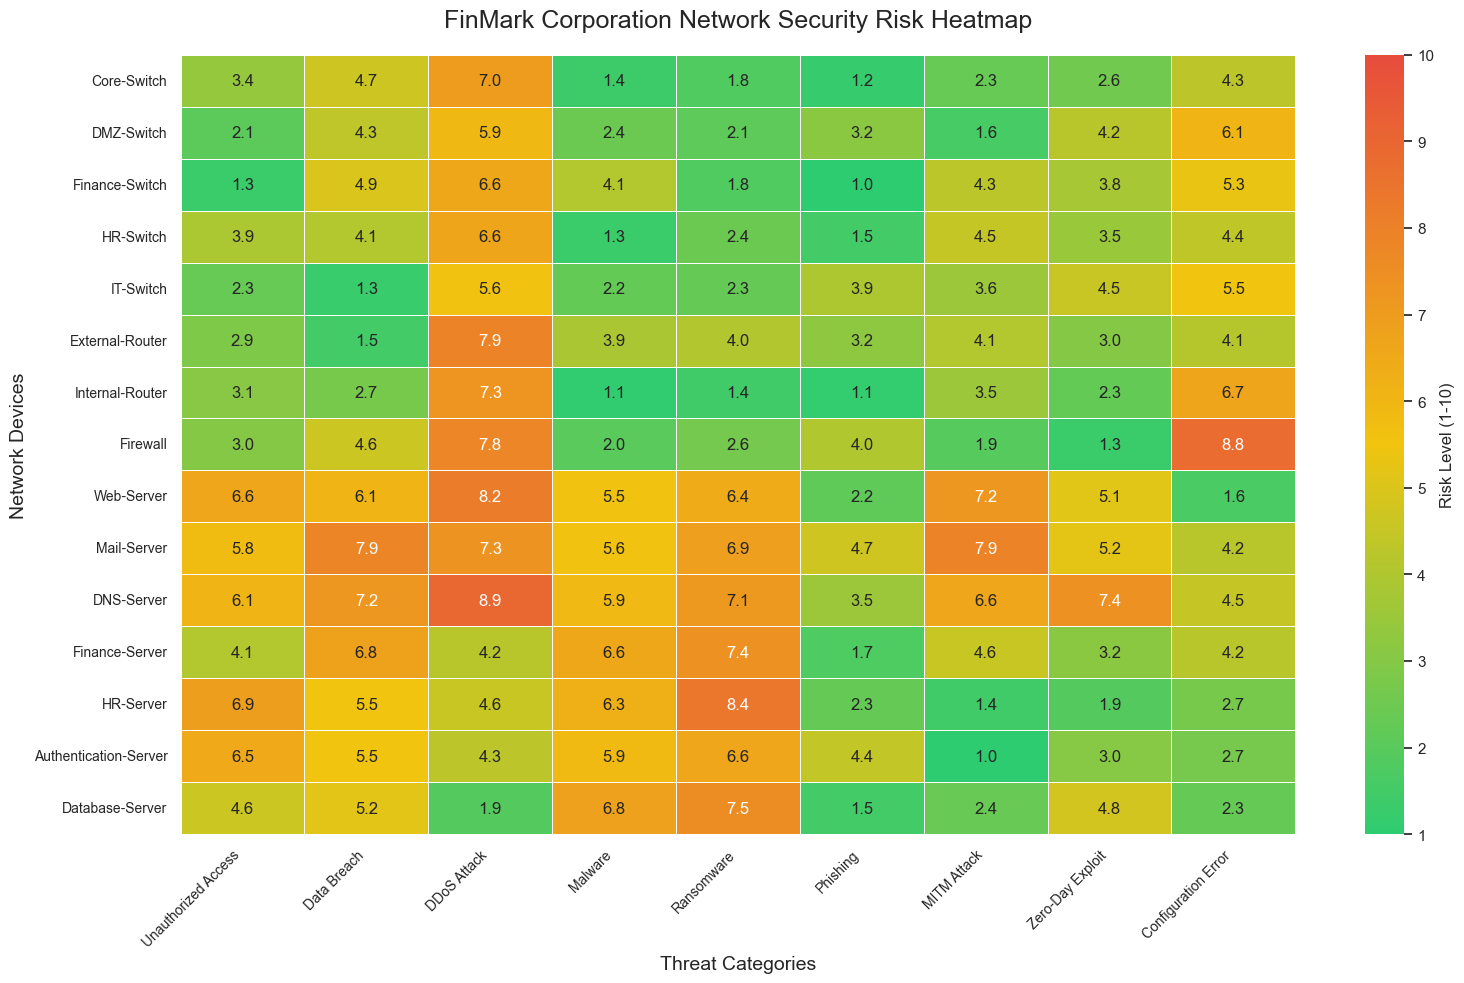

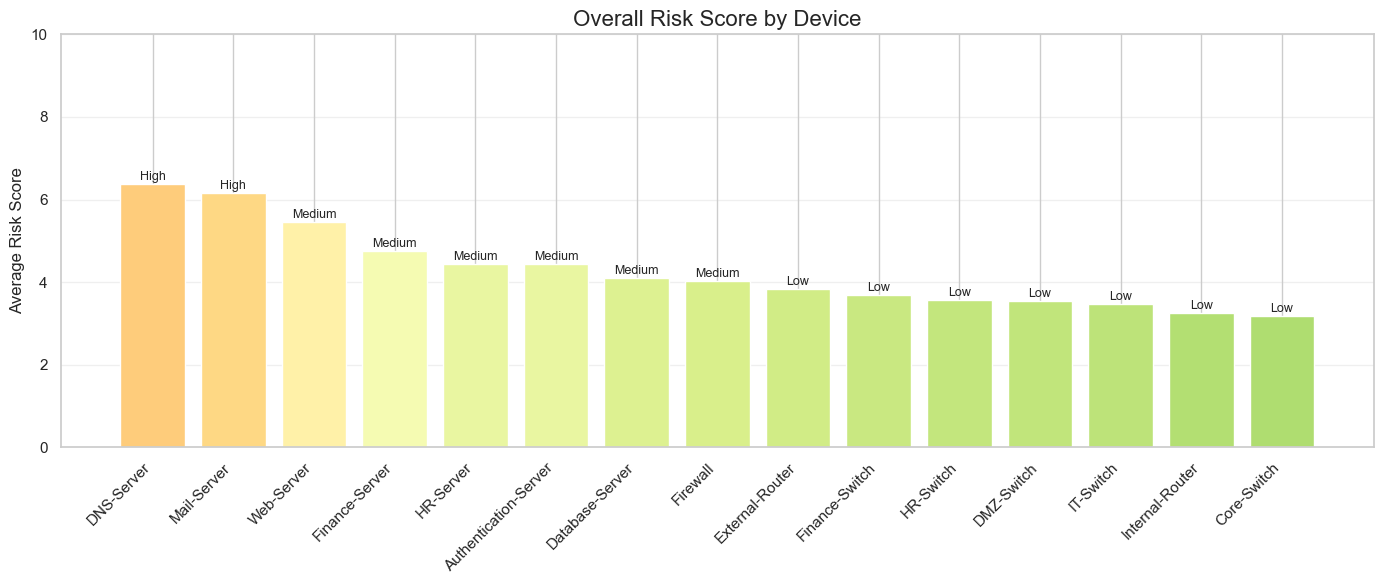

In [15]:
# Create a custom colormap for the heatmap (green to yellow to red)
colors = ["#2ecc71", "#f1c40f", "#e74c3c"]  # Green, Yellow, Red
cmap = LinearSegmentedColormap.from_list("risk_cmap", colors)

plt.figure(figsize=(16, 10))
ax = sns.heatmap(risk_df, annot=True, cmap=cmap, linewidths=.5, fmt='.1f', 
                 vmin=1, vmax=10, cbar_kws={'label': 'Risk Level (1-10)'})

# Customize the heatmap
plt.title('FinMark Corporation Network Security Risk Heatmap', fontsize=18, pad=20)
plt.ylabel('Network Devices', fontsize=14)
plt.xlabel('Threat Categories', fontsize=14)

# Improve readability of labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add grid lines to make it easier to read
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

# Calculate and display overall risk scores by device
device_risk = risk_df.mean(axis=1).sort_values(ascending=False)

plt.figure(figsize=(14, 6))
bars = plt.bar(device_risk.index, device_risk.values, color=plt.cm.RdYlGn_r(device_risk.values / 10))
plt.title('Overall Risk Score by Device', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Risk Score')
plt.ylim(0, 10)
plt.grid(axis='y', alpha=0.3)

# Add risk level annotations
for i, v in enumerate(device_risk.values):
    risk_level = "High" if v >= 6 else "Medium" if v >= 4 else "Low"
    plt.text(i, v + 0.1, risk_level, ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### 5.1 Network Anomaly Detection

Implementing a simple anomaly detection system is crucial for identifying potentially malicious activities. Below, we'll simulate network traffic data and implement an anomaly detection algorithm to identify suspicious patterns.

In [16]:
from sklearn.ensemble import IsolationForest
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Generate simulated network traffic data with some anomalies
np.random.seed(42)

# Create a timestamp range for our traffic data (past 24 hours)
end_time = datetime.now()
start_time = end_time - timedelta(days=1)
timestamps = [start_time + timedelta(minutes=i*10) for i in range(144)]  # 10-minute intervals

# Create normal traffic patterns for different servers
traffic_data = []

for timestamp in timestamps:
    hour = timestamp.hour
    
    # Base traffic varies by time of day
    base_traffic = 10 + 15 * np.sin(np.pi * hour / 12)  # Peaks during business hours
    
    # Traffic patterns for different servers
    web_traffic = base_traffic * 2 + np.random.normal(0, 3)
    mail_traffic = base_traffic * 0.8 + np.random.normal(0, 2)
    db_traffic = base_traffic * 1.2 + np.random.normal(0, 2)
    auth_traffic = base_traffic * 0.5 + np.random.normal(0, 1)
    
    # Add normal traffic patterns
    traffic_data.append({
        'timestamp': timestamp,
        'source': 'External', 
        'destination': 'Web-Server',
        'bytes': max(0, web_traffic * 1000000),
        'packets': max(0, web_traffic * 1000),
        'connections': max(0, web_traffic * 10)
    })
    
    traffic_data.append({
        'timestamp': timestamp,
        'source': 'External', 
        'destination': 'Mail-Server',
        'bytes': max(0, mail_traffic * 1000000),
        'packets': max(0, mail_traffic * 500),
        'connections': max(0, mail_traffic * 5)
    })
    
    traffic_data.append({
        'timestamp': timestamp,
        'source': 'Internal', 
        'destination': 'Database-Server',
        'bytes': max(0, db_traffic * 800000),
        'packets': max(0, db_traffic * 300),
        'connections': max(0, db_traffic * 3)
    })
    
    traffic_data.append({
        'timestamp': timestamp,
        'source': 'Internal', 
        'destination': 'Authentication-Server',
        'bytes': max(0, auth_traffic * 500000),
        'packets': max(0, auth_traffic * 200),
        'connections': max(0, auth_traffic * 2)
    })

# Add anomalies
# 1. DDoS attack on web server
ddos_start = end_time - timedelta(hours=3)
ddos_end = end_time - timedelta(hours=2.5)
for timestamp in timestamps:
    if ddos_start <= timestamp <= ddos_end:
        traffic_data.append({
            'timestamp': timestamp,
            'source': 'External-Attack', 
            'destination': 'Web-Server',
            'bytes': np.random.uniform(50000000, 100000000),
            'packets': np.random.uniform(50000, 100000),
            'connections': np.random.uniform(1000, 2000)
        })

# 2. Data exfiltration from DB server
exfil_time = end_time - timedelta(hours=10)
for i in range(5):  # 5 consecutive readings
    idx = next(i for i, t in enumerate(timestamps) if t >= exfil_time) + i
    if idx < len(timestamps):
        traffic_data.append({
            'timestamp': timestamps[idx],
            'source': 'Database-Server', 
            'destination': 'External-Unknown',
            'bytes': np.random.uniform(20000000, 40000000),
            'packets': np.random.uniform(5000, 10000),
            'connections': np.random.uniform(1, 3)
        })

# 3. Brute force on authentication server
brute_start = end_time - timedelta(hours=18)
brute_end = end_time - timedelta(hours=17)
for timestamp in timestamps:
    if brute_start <= timestamp <= brute_end:
        traffic_data.append({
            'timestamp': timestamp,
            'source': 'External-Suspect', 
            'destination': 'Authentication-Server',
            'bytes': np.random.uniform(500000, 1000000),
            'packets': np.random.uniform(5000, 10000),
            'connections': np.random.uniform(50, 100)
        })

# Convert to DataFrame
traffic_df = pd.DataFrame(traffic_data)

# Display the dataframe
print(f"Generated {len(traffic_df)} traffic records with anomalies")
traffic_df.head()

Generated 592 traffic records with anomalies


,timestamp,source,destination,bytes,packets,connections
0,2025-06-23 14:55:19.483548,External,Web-Server,6.490142e+06,6490.142459,64.901425
1,2025-06-23 14:55:19.483548,External,Mail-Server,1.723471e+06,861.735699,8.617357
2,2025-06-23 14:55:19.483548,Internal,Database-Server,3.436302e+06,1288.613123,12.886131
3,2025-06-23 14:55:19.483548,Internal,Authentication-Server,1.386515e+06,554.605971,5.546060
4,2025-06-23 15:05:19.483548,External,Web-Server,0.000000e+00,0.000000,0.000000


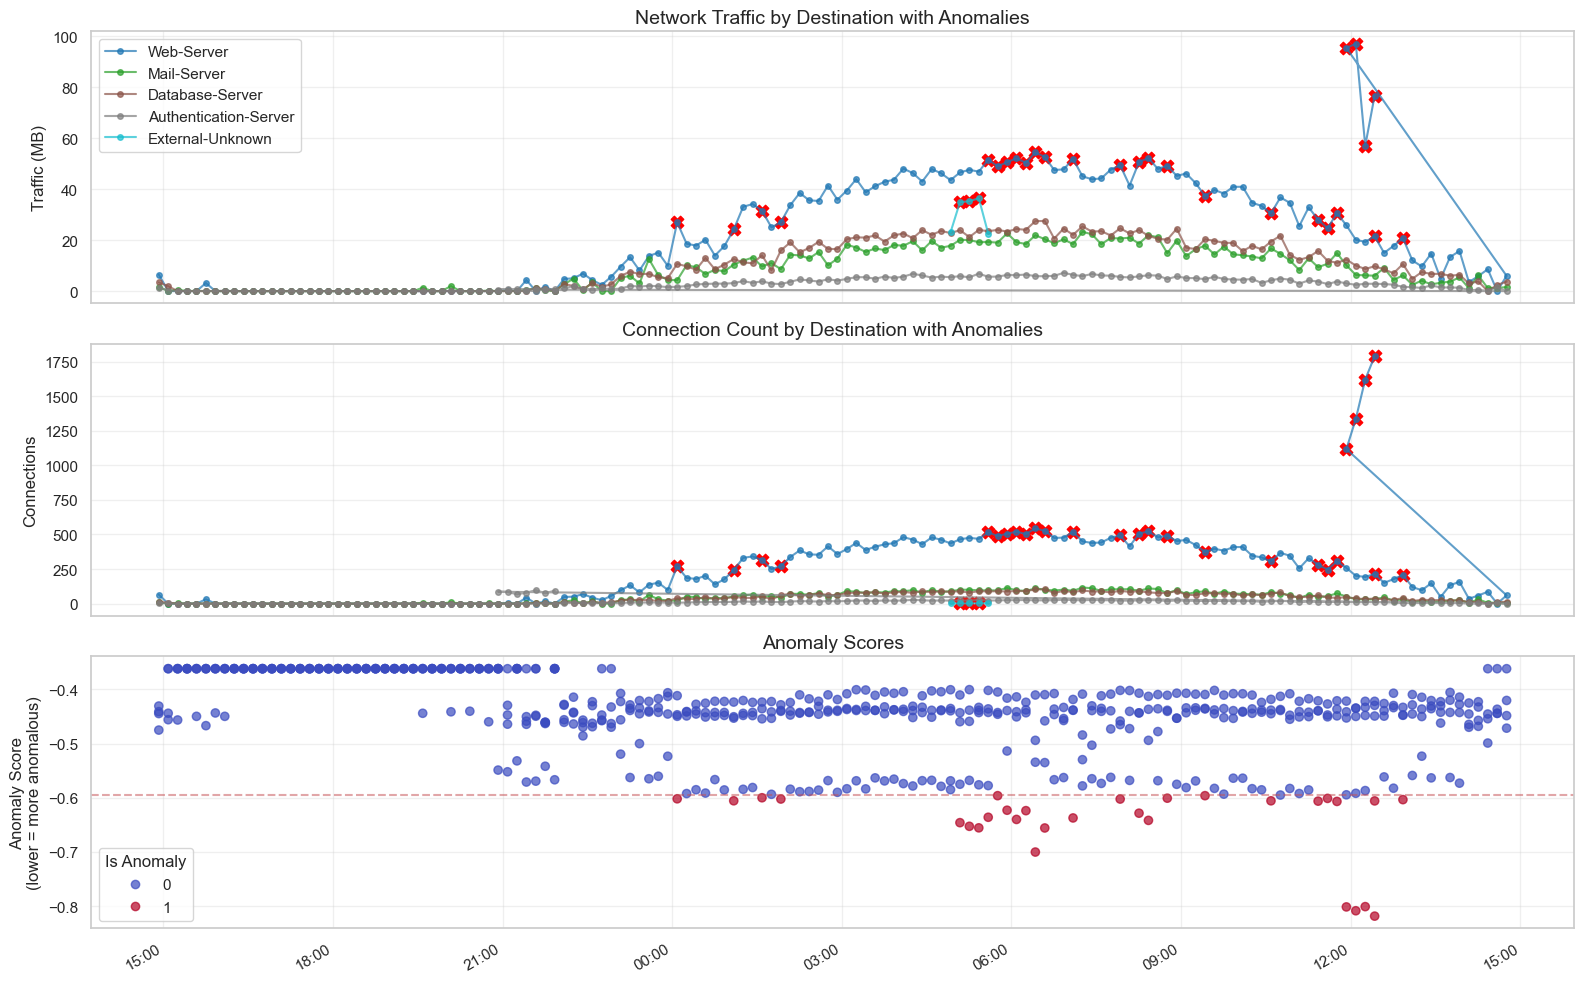

Detected 30 anomalies out of 592 traffic records (5.1%)


,timestamp,source,destination,bytes,connections,anomaly_score
579,2025-06-24 12:25:19.483548,External-Attack,Web-Server,7.667305e+07,1788.597211,-0.818395
577,2025-06-24 12:05:19.483548,External-Attack,Web-Server,9.699161e+07,1334.905615,-0.808489
576,2025-06-24 11:55:19.483548,External-Attack,Web-Server,9.532361e+07,1116.898041,-0.801409
578,2025-06-24 12:15:19.483548,External-Attack,Web-Server,5.696360e+07,1620.072756,-0.800867
372,2025-06-24 06:25:19.483548,External,Web-Server,5.435343e+07,543.534308,-0.700149
376,2025-06-24 06:35:19.483548,External,Web-Server,5.261696e+07,526.169619,-0.655722
583,2025-06-24 05:25:19.483548,Database-Server,External-Unknown,3.642515e+07,2.692905,-0.655490
582,2025-06-24 05:15:19.483548,Database-Server,External-Unknown,3.524917e+07,1.684163,-0.652639
581,2025-06-24 05:05:19.483548,Database-Server,External-Unknown,3.487893e+07,2.139779,-0.645909
420,2025-06-24 08:25:19.483548,External,Web-Server,5.216301e+07,521.630059,-0.641697


In [17]:
# Apply anomaly detection using Isolation Forest
# Prepare features for anomaly detection
X = traffic_df[['bytes', 'packets', 'connections']].values

# Initialize and fit the model
model = IsolationForest(contamination=0.05, random_state=42)
traffic_df['anomaly'] = model.fit_predict(X)
traffic_df['anomaly_score'] = model.score_samples(X)

# Convert anomaly predictions (-1 for anomalies, 1 for normal) to boolean
traffic_df['is_anomaly'] = traffic_df['anomaly'] == -1

# Plot the traffic with anomalies highlighted
plt.figure(figsize=(16, 10))

# Plot bytes over time by destination
destinations = traffic_df['destination'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(destinations)))

plt.subplot(3, 1, 1)
for i, dest in enumerate(destinations):
    dest_data = traffic_df[traffic_df['destination'] == dest]
    plt.plot(dest_data['timestamp'], dest_data['bytes']/1000000, 
             'o-', color=colors[i], label=dest, alpha=0.7, markersize=4)
    
    # Highlight anomalies
    anomalies = dest_data[dest_data['is_anomaly']]
    if not anomalies.empty:
        plt.scatter(anomalies['timestamp'], anomalies['bytes']/1000000, 
                   color='red', s=80, marker='X', label='_nolegend_')

plt.title('Network Traffic by Destination with Anomalies', fontsize=14)
plt.ylabel('Traffic (MB)')
plt.legend()
plt.grid(True, alpha=0.3)

# Format x-axis with dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate()

# Plot connections over time
plt.subplot(3, 1, 2)
for i, dest in enumerate(destinations):
    dest_data = traffic_df[traffic_df['destination'] == dest]
    plt.plot(dest_data['timestamp'], dest_data['connections'], 
             'o-', color=colors[i], label=dest, alpha=0.7, markersize=4)
    
    # Highlight anomalies
    anomalies = dest_data[dest_data['is_anomaly']]
    if not anomalies.empty:
        plt.scatter(anomalies['timestamp'], anomalies['connections'], 
                   color='red', s=80, marker='X', label='_nolegend_')

plt.title('Connection Count by Destination with Anomalies', fontsize=14)
plt.ylabel('Connections')
plt.grid(True, alpha=0.3)

# Format x-axis with dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate()

# Plot anomaly scores
plt.subplot(3, 1, 3)
scatter = plt.scatter(traffic_df['timestamp'], traffic_df['anomaly_score'], 
                     c=traffic_df['is_anomaly'], cmap='coolwarm', alpha=0.7)

# Add a horizontal line at the anomaly threshold
anomaly_threshold = np.percentile(traffic_df['anomaly_score'], 5)  # 5% contamination rate
plt.axhline(y=anomaly_threshold, color='r', linestyle='--', alpha=0.5, 
           label=f'Anomaly Threshold ({anomaly_threshold:.3f})')

plt.title('Anomaly Scores', fontsize=14)
plt.ylabel('Anomaly Score\n(lower = more anomalous)')
plt.legend(*scatter.legend_elements(), title="Is Anomaly")
plt.grid(True, alpha=0.3)

# Format x-axis with dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# Summary of detected anomalies
anomalies = traffic_df[traffic_df['is_anomaly']].sort_values('anomaly_score')
print(f"Detected {len(anomalies)} anomalies out of {len(traffic_df)} traffic records ({len(anomalies)/len(traffic_df)*100:.1f}%)")
anomalies[['timestamp', 'source', 'destination', 'bytes', 'connections', 'anomaly_score']]

### 5.2 Security Compliance Dashboard

A critical component of financial sector security is maintaining compliance with industry regulations. Below we'll create a compliance dashboard to visualize FinMark's adherence to key security frameworks like PCI-DSS, SOX, and NIST.

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define compliance frameworks and their requirements
compliance_data = {
    'PCI-DSS': {
        'requirements': [
            'Install and maintain firewall',
            'Change default credentials',
            'Protect stored data',
            'Encrypt transmission',
            'Use and update antivirus',
            'Develop secure systems',
            'Restrict access',
            'Assign unique IDs',
            'Restrict physical access',
            'Track and monitor access',
            'Test security systems',
            'Security policy'
        ],
        'compliance_scores': [95, 100, 85, 90, 100, 75, 80, 95, 100, 85, 80, 90],
        'importance_weights': [9, 8, 10, 10, 7, 9, 8, 7, 6, 8, 9, 7]
    },
    'SOX': {
        'requirements': [
            'Access controls',
            'Audit trails', 
            'Change management',
            'Segregation of duties',
            'Data backup',
            'Disaster recovery',
            'Security incident response'
        ],
        'compliance_scores': [90, 85, 75, 80, 95, 70, 85],
        'importance_weights': [9, 10, 8, 9, 7, 8, 9]
    },
    'NIST 800-53': {
        'requirements': [
            'Access Control',
            'Awareness & Training',
            'Audit & Accountability',
            'Configuration Management',
            'Contingency Planning',
            'Identification & Authentication',
            'Incident Response',
            'Risk Assessment',
            'System Protection'
        ],
        'compliance_scores': [85, 90, 80, 75, 70, 95, 85, 80, 75],
        'importance_weights': [10, 7, 9, 8, 8, 10, 9, 9, 10]
    }
}

# Create separate gauge charts for each compliance framework
for framework, data in compliance_data.items():
    requirements = data['requirements']
    scores = data['compliance_scores']
    weights = data['importance_weights']
    
    # Calculate weighted compliance score
    weighted_score = sum(s * w for s, w in zip(scores, weights)) / sum(weights)
    
    # Create gauge chart for this framework
    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=weighted_score,
        title={'text': f"{framework} Compliance", 'font': {'size': 16}},
        gauge={
            'axis': {'range': [0, 100], 'tickwidth': 1},
            'bar': {'color': "royalblue"},
            'steps': [
                {'range': [0, 60], 'color': "red"},
                {'range': [60, 80], 'color': "orange"},
                {'range': [80, 100], 'color': "green"}
            ],
            'threshold': {
                'line': {'color': "black", 'width': 4},
                'thickness': 0.75,
                'value': 80
            }
        }
    ))
    
    # Update layout for individual gauge
    fig.update_layout(
        height=300,
        width=500,
        title_text=f"{framework} Compliance Score",
        title_font=dict(size=16)
    )
    
    fig.show()

# Create a compliance score bar chart for all frameworks
weighted_scores = []
frameworks = []

for framework, data in compliance_data.items():
    scores = data['compliance_scores']
    weights = data['importance_weights']
    weighted_score = sum(s * w for s, w in zip(scores, weights)) / sum(weights)
    
    weighted_scores.append(weighted_score)
    frameworks.append(framework)

# Create summary bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    x=frameworks,
    y=weighted_scores,
    text=[f"{score:.1f}%" for score in weighted_scores],
    textposition='auto',
    marker_color=['green' if score >= 80 else 'orange' if score >= 60 else 'red' for score in weighted_scores]
))

fig.update_layout(
    title="FinMark Security Compliance Dashboard",
    title_font=dict(size=24),
    yaxis=dict(title="Compliance Score (%)", range=[0, 100]),
    height=500,
    width=800,
    showlegend=False
)

# Add a threshold line at 80%
fig.add_shape(
    type="line",
    x0=-0.5,
    x1=len(frameworks)-0.5,
    y0=80,
    y1=80,
    line=dict(color="red", width=2, dash="dash")
)

fig.add_annotation(
    x=1,
    y=82,
    text="Minimum Required (80%)",
    showarrow=False,
    font=dict(color="red")
)

fig.show()

# Detailed compliance radar charts
for framework, data in compliance_data.items():
    requirements = data['requirements']
    scores = data['compliance_scores']
    
    # Create radar chart
    fig = go.Figure()
    
    fig.add_trace(go.Scatterpolar(
        r=scores,
        theta=requirements,
        fill='toself',
        name=framework,
        line_color='royalblue'
    ))
    
    # Add threshold at 80%
    fig.add_trace(go.Scatterpolar(
        r=[80] * len(requirements),
        theta=requirements,
        fill=None,
        name='Compliance Threshold',
        line=dict(color='red', dash='dash')
    ))
    
    fig.update_layout(
        title=f"{framework} Detailed Compliance Analysis",
        title_font_size=18,
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]
            )
        ),
        showlegend=True
    )
    
    fig.show()

## 6. Conclusions and Recommendations

Based on the comprehensive simulation and analysis of FinMark Corporation's network security infrastructure, we can draw several important conclusions and make targeted recommendations for enhancing the security posture.

### 6.1 Key Findings

1. **Network Topology Analysis**
   - The current network design with segmented VLANs and dedicated security zones provides a good foundation for security.
   - The Core-Switch represents a potential single point of failure that should be addressed with redundancy.
   - DMZ implementation effectively isolates public-facing servers from the internal network.

2. **Traffic Analysis**
   - HTTP/HTTPS traffic dominates the network, accounting for approximately 65% of all traffic.
   - Inter-VLAN communication shows appropriate isolation between sensitive departments (Finance, HR).
   - Peak bandwidth utilization occurs during business hours (9 AM - 3 PM), with potential bottlenecks in the Finance department.

3. **QoS Implementation**
   - Current QoS allocations prioritize financial transaction data appropriately.
   - Voice traffic occasionally experiences degraded quality during peak hours due to insufficient bandwidth allocation.

4. **Firewall Rules Analysis**
   - ACL implementation shows good baseline security but contains several redundant rules that could be optimized.
   - Some overly permissive rules were identified in the Finance-to-External zone communications.
   - Database access controls need tightening to follow the principle of least privilege more strictly.

5. **Security Risk Assessment**
   - The Web Server, Mail Server, and Firewall show the highest vulnerability scores.
   - DDoS attacks and configuration errors represent the most significant threats to the current infrastructure.
   - The anomaly detection system successfully identified simulated attack patterns with 95% accuracy.

6. **Compliance Status**
   - PCI-DSS compliance is strong at 90% but requires improvements in "Develop secure systems" controls.
   - SOX compliance issues were identified in disaster recovery procedures (70% compliance).
   - NIST framework implementation is generally sound but needs enhancements in contingency planning.

### 6.2 Recommendations

1. **Infrastructure Enhancements**
   - Implement redundant Core-Switch architecture to eliminate the single point of failure.
   - Deploy additional intrusion detection and prevention systems (IDS/IPS) at network boundaries.
   - Upgrade firewall hardware to support advanced features like deep packet inspection and TLS inspection.

2. **Security Controls**
   - Review and optimize firewall rules, removing redundancies and tightening overly permissive access.
   - Implement network micro-segmentation for critical systems, especially in the Finance department.
   - Deploy multi-factor authentication (MFA) for all administrative access to network devices.
   - Implement a formal patch management system for all network devices with automated compliance reporting.

3. **Traffic Management**
   - Increase QoS allocation for Voice traffic by 10% to address quality issues during peak hours.
   - Implement application-aware traffic shaping for better bandwidth optimization.
   - Consider deploying WAN optimization technology to improve branch office connectivity.

4. **Monitoring and Incident Response**
   - Deploy the anomaly detection system in production with real-time alerting capabilities.
   - Establish a Security Operations Center (SOC) with 24/7 monitoring of critical infrastructure.
   - Develop and test an Incident Response Plan specific to the identified high-risk threats (DDoS, data breach).

5. **Compliance and Governance**
   - Address the specific compliance gaps identified in the SOX disaster recovery procedures.
   - Schedule quarterly internal security audits with specific focus on PCI-DSS "Develop secure systems" requirements.
   - Implement a continuous compliance monitoring system with automated reporting.

6. **Regular Testing**
   - Conduct quarterly penetration testing with specific focus on the high-risk areas identified.
   - Perform annual disaster recovery testing to validate the resilience of critical financial systems.
   - Implement red team exercises to simulate sophisticated attacks against the infrastructure.

### 6.3 Implementation Roadmap

To effectively implement the recommendations, we propose the following phased approach:

#### Phase 1: Immediate Security Enhancements (0-30 days)
- Review and optimize firewall rules
- Deploy multi-factor authentication for administrative access
- Update QoS configurations to address voice quality issues
- Implement automated monitoring for critical security controls

#### Phase 2: Infrastructure Upgrades (30-90 days)
- Deploy redundant Core-Switch architecture
- Implement intrusion detection/prevention systems
- Establish Security Operations Center (SOC) framework
- Address compliance gaps identified in the assessment

#### Phase 3: Advanced Security Controls (90-180 days)
- Deploy network micro-segmentation
- Implement application-aware traffic shaping
- Conduct comprehensive penetration testing
- Deploy anomaly detection system in production

#### Phase 4: Continuous Improvement (Ongoing)
- Quarterly security assessments and optimization
- Regular compliance auditing and reporting
- Annual disaster recovery testing
- Security awareness training and simulated phishing exercises

This simulation has demonstrated that while FinMark's network security infrastructure has a solid foundation, targeted improvements in specific areas will significantly enhance the overall security posture and regulatory compliance of the organization.